# Machine Learning Use Case "Surface Type Classification"
## Section A - Introduction

Q1 - What kind of data we have?


Q2 - What kind of objective we have?

Q3 - Is there a specific Methodology to follow? OSEMN

## Section B - Rsearch Questions:

RQ1 - What are the main features that help in detecting the surface type? 

RQ2 - How to use these features to classify the surface type? 

RQ3 - How to evaluate the reliability of the model?

## Section C - Research Objectives

RO1 - Utilize IoT sensors to capture x, y, z accelerometer and x, y, z gyroscope data.

RO2 - Employ machine learning techniques to understand patterns and classify surfaces accordingly. 

RO3 - Perform a train-test split to evaluate the performance of the model. 

## Section D - Research Methodology

Following the OSEMN Methodology ""Obtain, Scrub, Explore, Model, and iNterpret."

## Section E - Exploratory Data Analysis (EDA)

#### Section E-1 Loading data


In [1]:
# Import necessary libraries
import pandas as pd # For data frame reading/manipulation
import numpy as np # For mathematical calculations
import matplotlib.pyplot as plt # For plotting

In [2]:
# Grass Slopy Wet Surface DataFrame
GSW = pd.read_csv('../datasets/Bushra/24_grass_slopy_wet.csv', header = None) # Setting header as 'None' because the data does not have the column names

# Asphalt Flat Wet Surface DataFrame
AFW = pd.read_csv('../datasets/Bushra/22_asphalt_flat_wet.csv', header = None) 

# Concerete Dry Flat Surface DataFrame
CDF = pd.read_csv('../datasets/Bushra/22_asphalt_flat_wet.csv', header = None) 

# Stones Coarse Wet Surface DataFrame
SCW = pd.read_csv('../datasets/Bushra/14_stones_coarse_wet.csv', header = None)

# Tile Smooth Surface DataFrame
TS = pd.read_csv('../datasets/Bushra/14_stones_coarse_wet.csv', header = None)

In [3]:
# Defining the dictionary of tables we have to easily access them later on

# Dictionary = {'key':'Item'}
dict_of_tables = {'GSW': GSW, 'AFW': AFW, 'CDF': CDF, 'SCW': SCW, 'TS': TS}

#### Section E-2 Defining Columns names


In [4]:
# for table_name, table in dict_of_tables.items():
#     print(table)

In [5]:
# Define column names
column_names = ['Timestamp', 'x-accelerometer', 'y-accelerometer','z-accelerometer',
               'x-gyroscope','y-gyroscope','z-gyroscope']

# Iterate over each DataFrame in the dictionary and apply the code
for table_name, table in dict_of_tables.items():
    # Assign column names to the DataFrame
    table.columns = column_names

#### Section E-3 Exploring head and tail of each table


In [6]:
# # Exploring head and tail of each table
# print('The top 3 rows of GSW are')
# display(GSW.head(3))

# print('The last 3 rows of GSW are')
# display(GSW.tail(3))

# print('-'*25) # Segmenting between tables

# print('The top 3 rows of AFW are')
# display(AFW.head(3))

# print('The last 3 rows of AFW are')
# display(AFW.tail(3))

# print('-'*25) 
# print('The top 3 rows of CDF are')
# display(CDF.head(3))

# print('The last 3 rows of CDF are')
# display(CDF.tail(3))

# print('-'*25) 

# print('The top 3 rows of GMS are')
# display(GMS.head(3))

# print('The last 3 rows of GMS are')
# display(GMS.tail(3))

# print('-'*25) 

# print('The top 3 rows of CDB are')
# display(CDB.head(3))

# print('The last 3 rows of CDB are')
# display(CDB.tail(3))

# print('-'*25) 

# print('The top 3 rows of ADF are')
# display(ADF.head(3))

# print('The last 3 rows of ADF are')
# display(ADF.tail(3))

# print('-'*25) 


# print('The top 3 rows of TM are')
# display(TM.head(3))

# print('The last 3 rows of TM are')
# display(TM.tail(3))

In [7]:
# Iterate over each DataFrame in the dictionary and print head and tail
for table_name, table in dict_of_tables.items():
    
    print(f'The top 3 rows of {table_name} are')
    display(table.head(3))
    
    print(f'The last 3 rows of {table_name} are')
    display(table.tail(3))
    
    print('-'*50) # Segmenting between tables


The top 3 rows of GSW are


Timestamp  x-accelerometer  y-accelerometer  z-accelerometer  \
0  2024-03-21 13:46:48.330        -0.049316        -0.229492        -0.989746   
1  2024-03-21 13:46:48.340        -0.036865        -0.238770        -0.980957   
2  2024-03-21 13:46:48.349        -0.037842        -0.240479        -0.977051   

   x-gyroscope  y-gyroscope  z-gyroscope  
0     1.663208    -0.289917     0.381470  
1     1.678467    -0.396728     0.106812  
2     1.785278    -0.442505    -0.045776

The last 3 rows of GSW are


Timestamp  x-accelerometer  y-accelerometer  \
6037  2024-03-21 13:47:48.569         0.007324        -0.151611   
6038  2024-03-21 13:47:48.580         0.004639        -0.156250   
6039  2024-03-21 13:47:48.590         0.002197        -0.157959   

      z-accelerometer  x-gyroscope  y-gyroscope  z-gyroscope  
6037        -0.999023     0.869751     0.137329     0.289917  
6038        -0.997070     0.778198     0.122070     0.152588  
6039        -0.997559     0.885010     0.091553     0.061035

--------------------------------------------------
The top 3 rows of AFW are


Timestamp  x-accelerometer  y-accelerometer  z-accelerometer  \
0  2024-03-20 10:27:23.329         0.007080        -0.037842        -1.012207   
1  2024-03-20 10:27:23.340         0.006592        -0.036865        -1.011963   
2  2024-03-20 10:27:23.350         0.001953        -0.037354        -1.006592   

   x-gyroscope  y-gyroscope  z-gyroscope  
0     0.717163     0.289917     0.000000  
1     0.671387     0.244141     0.076294  
2     0.778198     0.198364    -0.030518

The last 3 rows of AFW are


Timestamp  x-accelerometer  y-accelerometer  \
8877  2024-03-20 10:28:51.910         0.013672        -0.075928   
8878  2024-03-20 10:28:51.920         0.014648        -0.074951   
8879  2024-03-20 10:28:51.930         0.012207        -0.076172   

      z-accelerometer  x-gyroscope  y-gyroscope  z-gyroscope  
8877        -1.005859     0.686645     0.259399     0.061035  
8878        -1.007080     0.732422     0.259399     0.076294  
8879        -1.008789     0.671387     0.350952     0.122070

--------------------------------------------------
The top 3 rows of CDF are


Timestamp  x-accelerometer  y-accelerometer  z-accelerometer  \
0  2024-03-20 10:27:23.329         0.007080        -0.037842        -1.012207   
1  2024-03-20 10:27:23.340         0.006592        -0.036865        -1.011963   
2  2024-03-20 10:27:23.350         0.001953        -0.037354        -1.006592   

   x-gyroscope  y-gyroscope  z-gyroscope  
0     0.717163     0.289917     0.000000  
1     0.671387     0.244141     0.076294  
2     0.778198     0.198364    -0.030518

The last 3 rows of CDF are


Timestamp  x-accelerometer  y-accelerometer  \
8877  2024-03-20 10:28:51.910         0.013672        -0.075928   
8878  2024-03-20 10:28:51.920         0.014648        -0.074951   
8879  2024-03-20 10:28:51.930         0.012207        -0.076172   

      z-accelerometer  x-gyroscope  y-gyroscope  z-gyroscope  
8877        -1.005859     0.686645     0.259399     0.061035  
8878        -1.007080     0.732422     0.259399     0.076294  
8879        -1.008789     0.671387     0.350952     0.122070

--------------------------------------------------
The top 3 rows of SCW are


Timestamp  x-accelerometer  y-accelerometer  z-accelerometer  \
0  2024-03-20 09:47:20.329        -0.066895        -0.076416        -1.004883   
1  2024-03-20 09:47:20.340        -0.072021        -0.081543        -1.003418   
2  2024-03-20 09:47:20.350        -0.076416        -0.080078        -1.003174   

   x-gyroscope  y-gyroscope  z-gyroscope  
0     0.640869     0.320435     0.015259  
1     0.778198     0.274658    -0.030518  
2     0.762939     0.183105     0.015259

The last 3 rows of SCW are


Timestamp  x-accelerometer  y-accelerometer  \
9917  2024-03-20 09:48:59.290        -0.097656        -0.060791   
9918  2024-03-20 09:48:59.299        -0.097168        -0.061035   
9919  2024-03-20 09:48:59.310        -0.097900        -0.060791   

      z-accelerometer  x-gyroscope  y-gyroscope  z-gyroscope  
9917        -1.002930     0.823975     0.152588     0.045776  
9918        -1.001953     0.778198     0.183105     0.000000  
9919        -1.002197     0.610352     0.228882     0.030518

--------------------------------------------------
The top 3 rows of TS are


Timestamp  x-accelerometer  y-accelerometer  z-accelerometer  \
0  2024-03-20 09:47:20.329        -0.066895        -0.076416        -1.004883   
1  2024-03-20 09:47:20.340        -0.072021        -0.081543        -1.003418   
2  2024-03-20 09:47:20.350        -0.076416        -0.080078        -1.003174   

   x-gyroscope  y-gyroscope  z-gyroscope  
0     0.640869     0.320435     0.015259  
1     0.778198     0.274658    -0.030518  
2     0.762939     0.183105     0.015259

The last 3 rows of TS are


Timestamp  x-accelerometer  y-accelerometer  \
9917  2024-03-20 09:48:59.290        -0.097656        -0.060791   
9918  2024-03-20 09:48:59.299        -0.097168        -0.061035   
9919  2024-03-20 09:48:59.310        -0.097900        -0.060791   

      z-accelerometer  x-gyroscope  y-gyroscope  z-gyroscope  
9917        -1.002930     0.823975     0.152588     0.045776  
9918        -1.001953     0.778198     0.183105     0.000000  
9919        -1.002197     0.610352     0.228882     0.030518

--------------------------------------------------


#### Section E-4 Checking datatype


In [8]:
# We will loop through each table to find the datatypes of the columns

for table_name, table in dict_of_tables.items():
    print('The table name is', table_name)
    print('table info is')
    display(table.info())
    print('-'*50)

The table name is GSW
table info is
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Timestamp        6040 non-null   object 
 1   x-accelerometer  6040 non-null   float64
 2   y-accelerometer  6040 non-null   float64
 3   z-accelerometer  6040 non-null   float64
 4   x-gyroscope      6040 non-null   float64
 5   y-gyroscope      6040 non-null   float64
 6   z-gyroscope      6040 non-null   float64
dtypes: float64(6), object(1)
memory usage: 330.4+ KB


None

--------------------------------------------------
The table name is AFW
table info is
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8880 entries, 0 to 8879
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Timestamp        8880 non-null   object 
 1   x-accelerometer  8880 non-null   float64
 2   y-accelerometer  8880 non-null   float64
 3   z-accelerometer  8880 non-null   float64
 4   x-gyroscope      8880 non-null   float64
 5   y-gyroscope      8880 non-null   float64
 6   z-gyroscope      8880 non-null   float64
dtypes: float64(6), object(1)
memory usage: 485.8+ KB


None

--------------------------------------------------
The table name is CDF
table info is
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8880 entries, 0 to 8879
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Timestamp        8880 non-null   object 
 1   x-accelerometer  8880 non-null   float64
 2   y-accelerometer  8880 non-null   float64
 3   z-accelerometer  8880 non-null   float64
 4   x-gyroscope      8880 non-null   float64
 5   y-gyroscope      8880 non-null   float64
 6   z-gyroscope      8880 non-null   float64
dtypes: float64(6), object(1)
memory usage: 485.8+ KB


None

--------------------------------------------------
The table name is SCW
table info is
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9920 entries, 0 to 9919
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Timestamp        9920 non-null   object 
 1   x-accelerometer  9920 non-null   float64
 2   y-accelerometer  9920 non-null   float64
 3   z-accelerometer  9920 non-null   float64
 4   x-gyroscope      9920 non-null   float64
 5   y-gyroscope      9920 non-null   float64
 6   z-gyroscope      9920 non-null   float64
dtypes: float64(6), object(1)
memory usage: 542.6+ KB


None

--------------------------------------------------
The table name is TS
table info is
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9920 entries, 0 to 9919
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Timestamp        9920 non-null   object 
 1   x-accelerometer  9920 non-null   float64
 2   y-accelerometer  9920 non-null   float64
 3   z-accelerometer  9920 non-null   float64
 4   x-gyroscope      9920 non-null   float64
 5   y-gyroscope      9920 non-null   float64
 6   z-gyroscope      9920 non-null   float64
dtypes: float64(6), object(1)
memory usage: 542.6+ KB


None

--------------------------------------------------


#### We noticed that the first column 'Timestamp' Dtype is 'object'

#### Section E-5 Fixing 'Timestamp' column datatype into timestamp



In [9]:
for table_name, table in dict_of_tables.items():
    table['Timestamp'] = pd.to_datetime(table['Timestamp']) # using pandas functionality to correct 'Timestamp' column datatype


In [10]:
# randomly checking of one of the tables
GSW.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Timestamp        6040 non-null   datetime64[ns]
 1   x-accelerometer  6040 non-null   float64       
 2   y-accelerometer  6040 non-null   float64       
 3   z-accelerometer  6040 non-null   float64       
 4   x-gyroscope      6040 non-null   float64       
 5   y-gyroscope      6040 non-null   float64       
 6   z-gyroscope      6040 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 330.4 KB


#### Section E-6 Sorting by timestamp

In [11]:
for table_name, table in dict_of_tables.items():

    table.sort_values(by='Timestamp', inplace=True) # Sort the table by 'Timestamp' column #Using 'inplace' Argument to apply the changes on the same table

    # Resetting the index after sorting
    table.reset_index(drop=True, inplace=True)



#### Section E-7 Removing 20 seconds (noise at start and ending)

In [12]:
# testing_table = dict_of_tables['GSW']
# testing_table.columns[0]

In [13]:
# testing_table['Timestamp']

In [14]:
# Looping through 'dict_of_tables' that is containing DataFrames

for table_name, table in dict_of_tables.items():
    # Accessing 'Timestamp' column, which is the first column
    timestamp_column = table.columns[0]
    
    # Calculate 20 seconds
    time_delta = pd.Timedelta(seconds=20)
    
    # Filter out the first and last 20 seconds
    filtered_data = table[(table[timestamp_column] >= (table[timestamp_column].iloc[0] + time_delta)) &
                               (table[timestamp_column] <= (table[timestamp_column].iloc[-1] - time_delta))]
    
    # Update the dictionary with filtered data
    dict_of_tables[table_name] = filtered_data


#### Section E-7.5 Exporting the trimmed datasets 

In [15]:
!pwd # checking path working directory 

/Users/bushrajalali/COMP4030-Data-Science-with-Machine-Learning/code


In [16]:
import os

# Highlight the folder path
save_path = '../datasets/Bushra/'

# Iterate through each key-value pair in the dictionary
for table_name, table in dict_of_tables.items():
    # Define the file name for the CSV
    file_name = f"{table_name}_trimmed.csv"
    # Define the file path
    file_path = os.path.join(save_path, file_name)
    
    # Export the DataFrame to a CSV file
    table.to_csv(file_path, index=False)
    
    print(f"Table '{table_name}' exported to '{file_name}' in path '{save_path}'")


Table 'GSW' exported to 'GSW_trimmed.csv' in path '../datasets/Bushra/'
Table 'AFW' exported to 'AFW_trimmed.csv' in path '../datasets/Bushra/'
Table 'CDF' exported to 'CDF_trimmed.csv' in path '../datasets/Bushra/'
Table 'SCW' exported to 'SCW_trimmed.csv' in path '../datasets/Bushra/'
Table 'TS' exported to 'TS_trimmed.csv' in path '../datasets/Bushra/'


#### Section E-8 Create first 10 seconds tables

In [17]:
# firstTimestamp = testing_table['Timestamp'].iloc[0]
# ten_seconds_later = firstTimestamp + pd.Timedelta(seconds=10)

# firstTimestamp
# ten_seconds_later
# testing_table[testing_table['Timestamp'] <= ten_seconds_later]

In [18]:
# dict_of_tables_10_seconds

In [19]:
# for table_name, table in dict_of_tables_10_seconds.items():
#     print(table_name)

In [20]:
dict_of_tables_10_seconds = {} # Creating an empty dictionary to fill it up with 10_seconds tables

# looping through the dictionary of tables
for table_name, table in dict_of_tables.items():

    # get the starting timestamp
    first_timestamp = table['Timestamp'].iloc[0]  # Get the first timestamp
    
    ten_seconds_after_first_timestamp = first_timestamp + pd.Timedelta(seconds=10)  # Calculate 10 seconds after the first timestamp
    first_10_seconds = table[table['Timestamp'] <= ten_seconds_after_first_timestamp]  # Select rows up to 10 seconds after the first timestamp
    dict_of_tables_10_seconds[table_name] = first_10_seconds # Storing the new filtered tables into the new dictionary


In [21]:
# chkecing a random table in the dict_of_tables_5_seconds
# dict_of_tables_10_seconds['ADF']

#### Section E-9 Plotting the first 10 seconds

In [22]:
print('The tables are:')
for item, key in dict_of_tables_10_seconds.items():
    print(item)


The tables are:
GSW
AFW
CDF
SCW
TS


In [23]:
# Regular Method trying on GSW

In [24]:
# # Creating a figure and a set of subplots with 6 rows and 1 column, adjusting the figure size and spacing between subplots
# fig, ax = plt.subplots(6, 1, figsize=(13, 30), gridspec_kw={'hspace': 0.4})

# # Iterating over each feature column (excluding the timestamp column) in the 'GSW' DataFrame
# for i, feature in enumerate(dict_of_tables_10_seconds['GSW'].columns[1:], 0):
    
#     # Plotting the feature against the timestamp for the 'GSW' DataFrame, with a green color
#     ax[i].plot(dict_of_tables_10_seconds['GSW']['Timestamp'], dict_of_tables_10_seconds['GSW'][feature], color='green')
    
#     # Setting the title for each subplot indicating the DataFrame name ('GSW') and the specific feature being plotted
#     ax[i].set_title('GSW ' + feature)
    
#     # Setting the x-axis label for each subplot
#     ax[i].set_xlabel('Timestamp')
    
#     # Setting the y-axis label for each subplot
#     ax[i].set_ylabel(feature)

# # Displaying the plot
# plt.show()


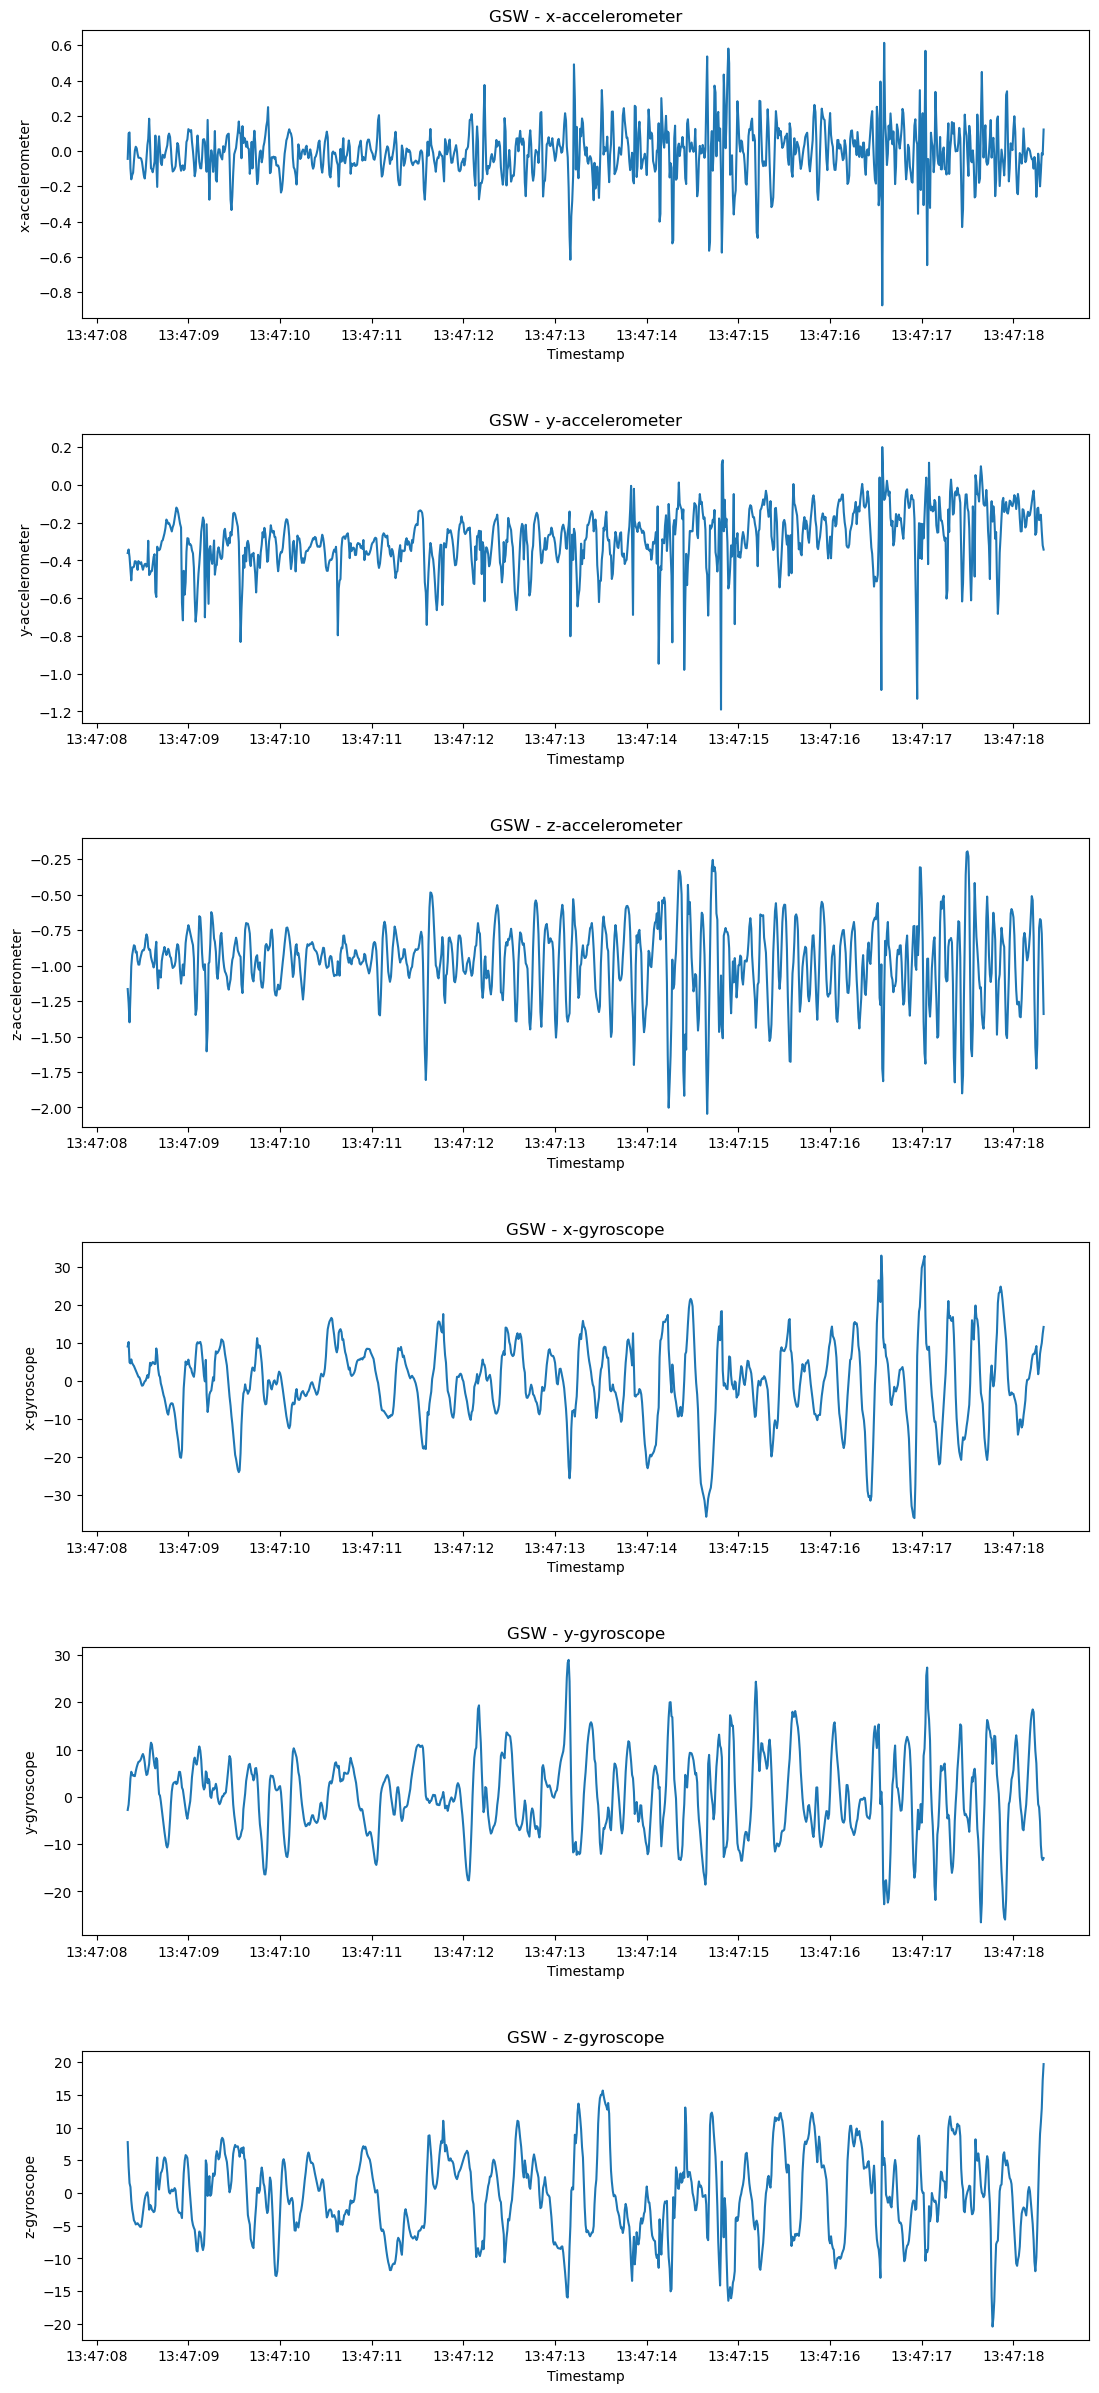

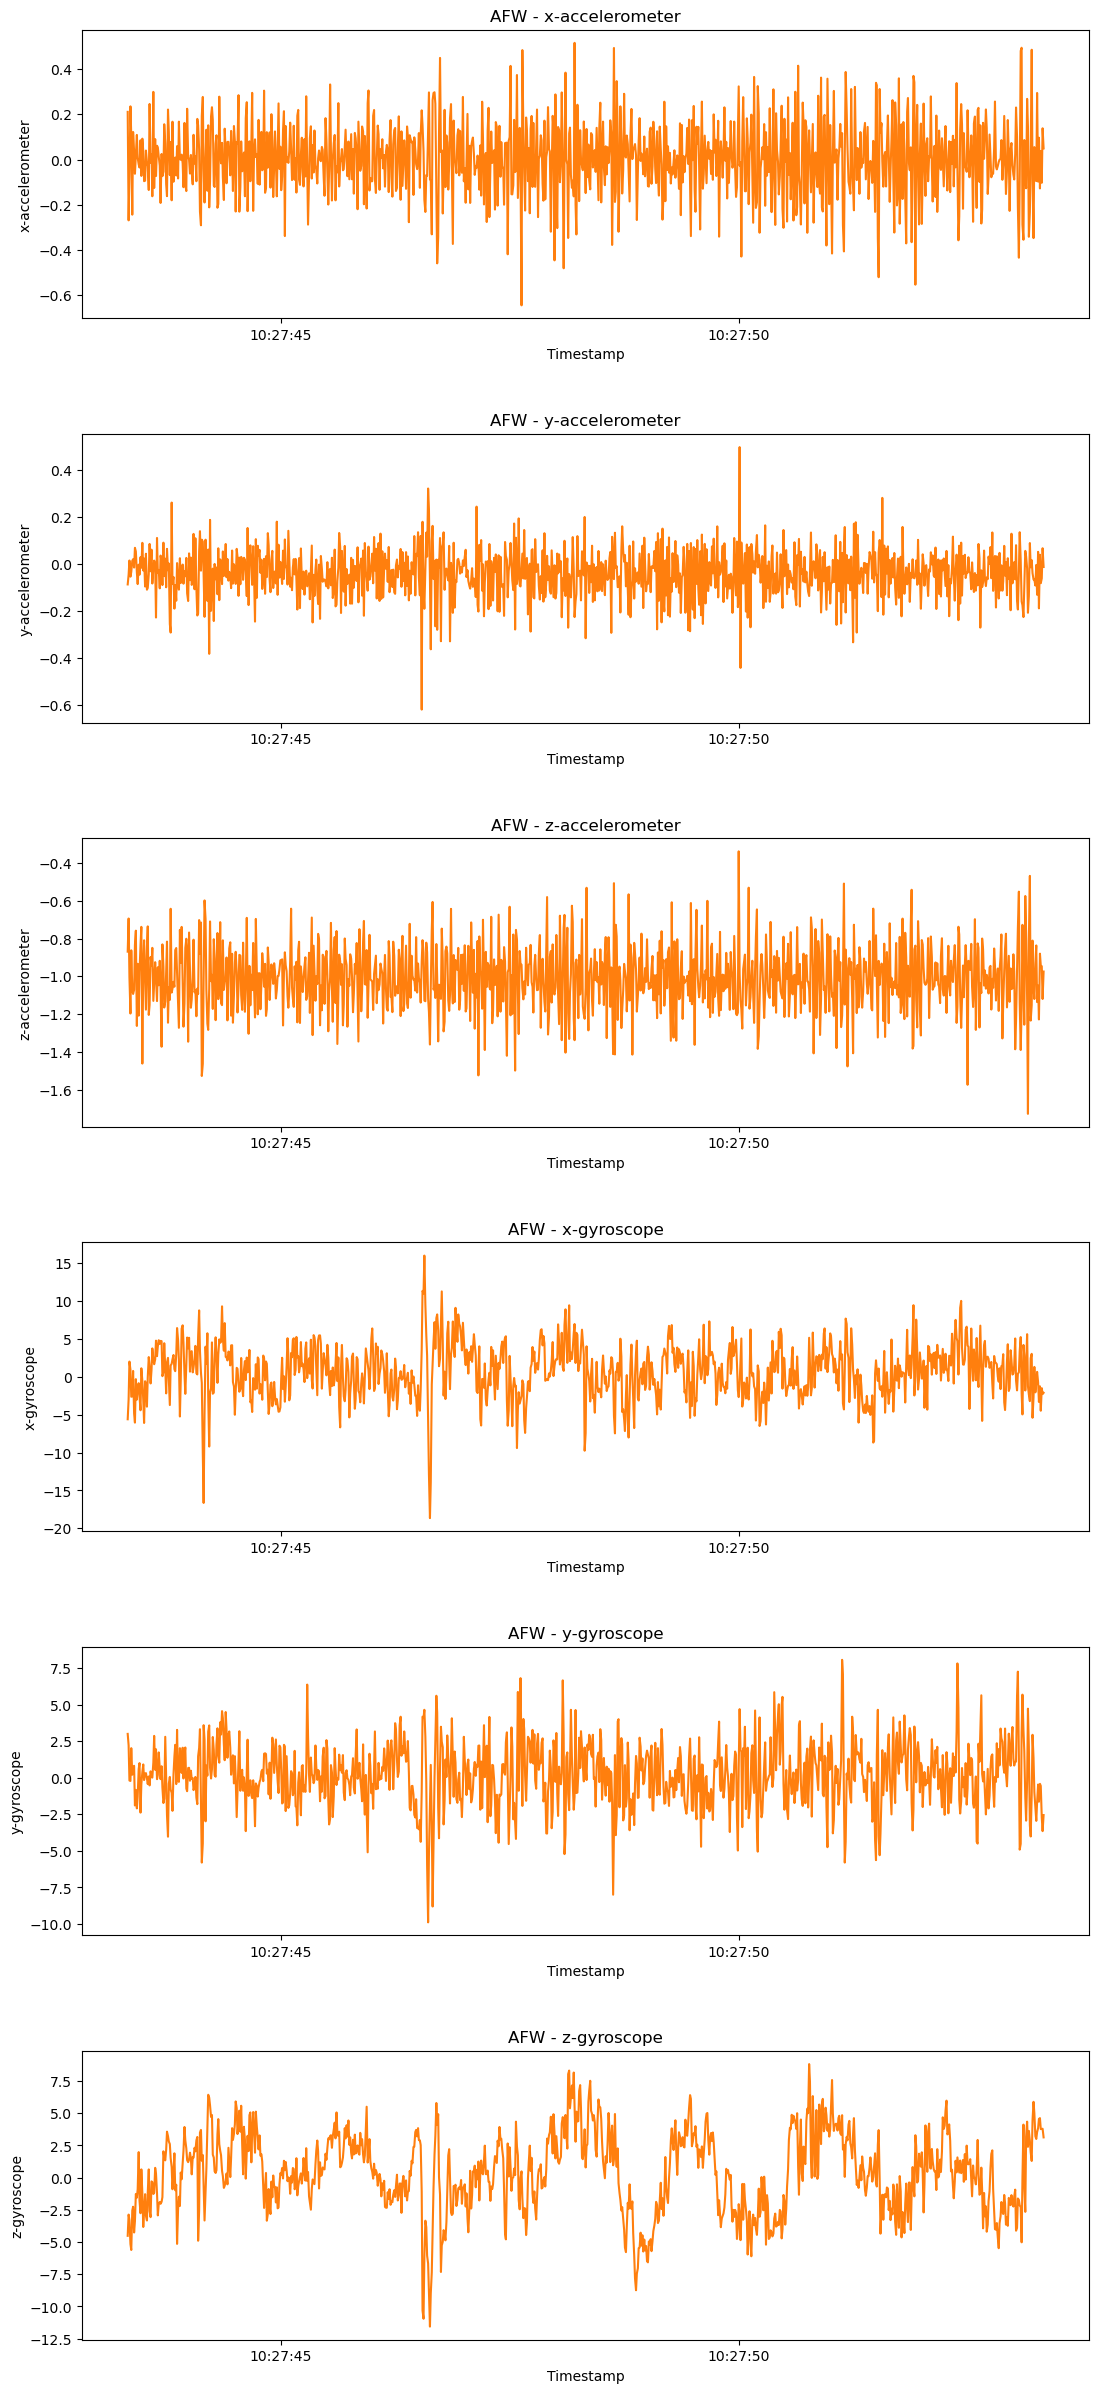

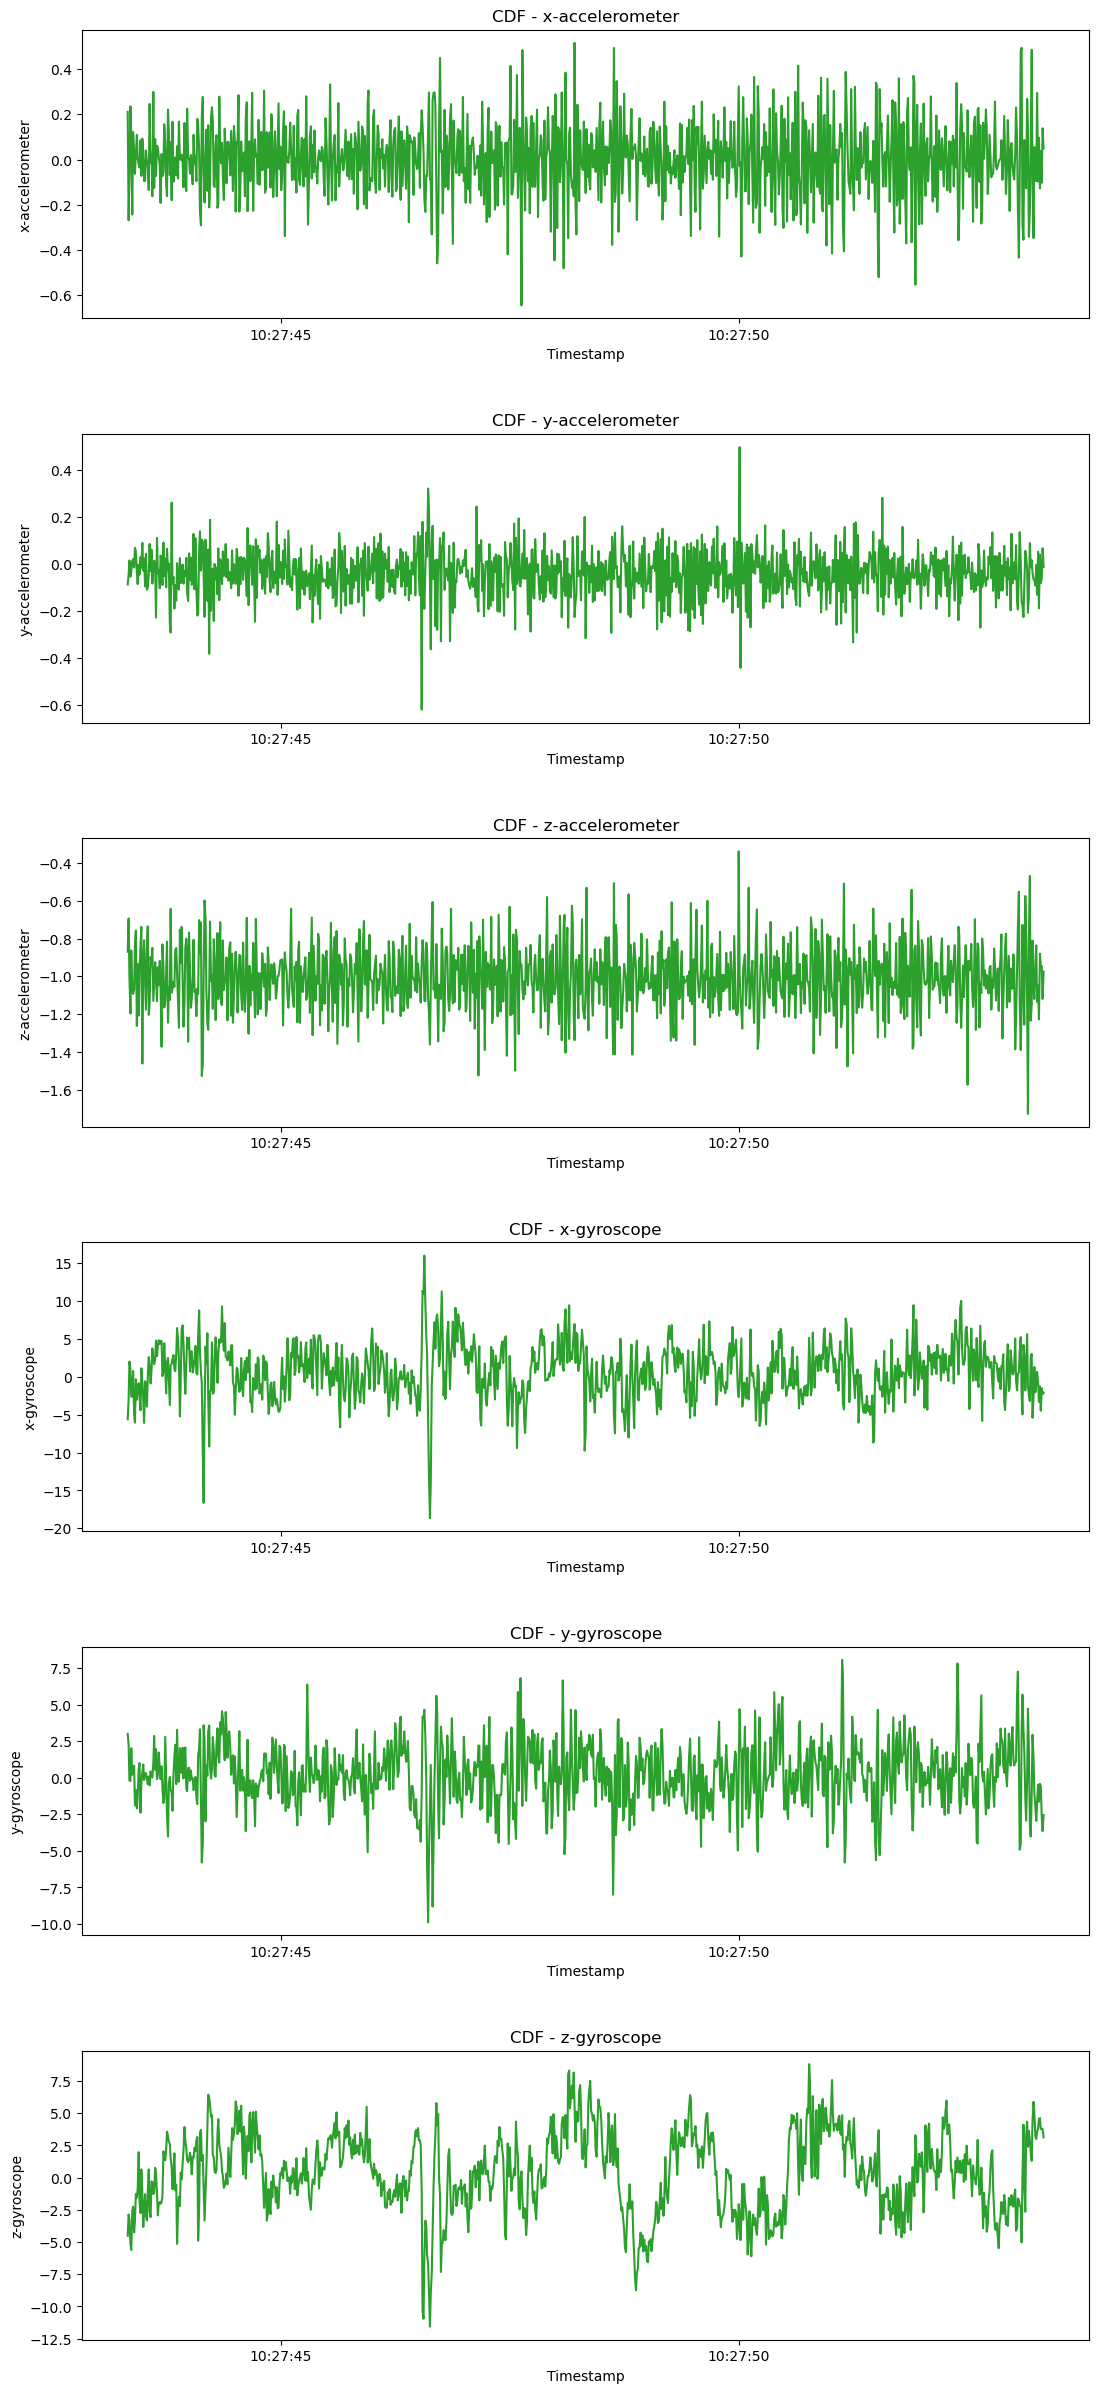

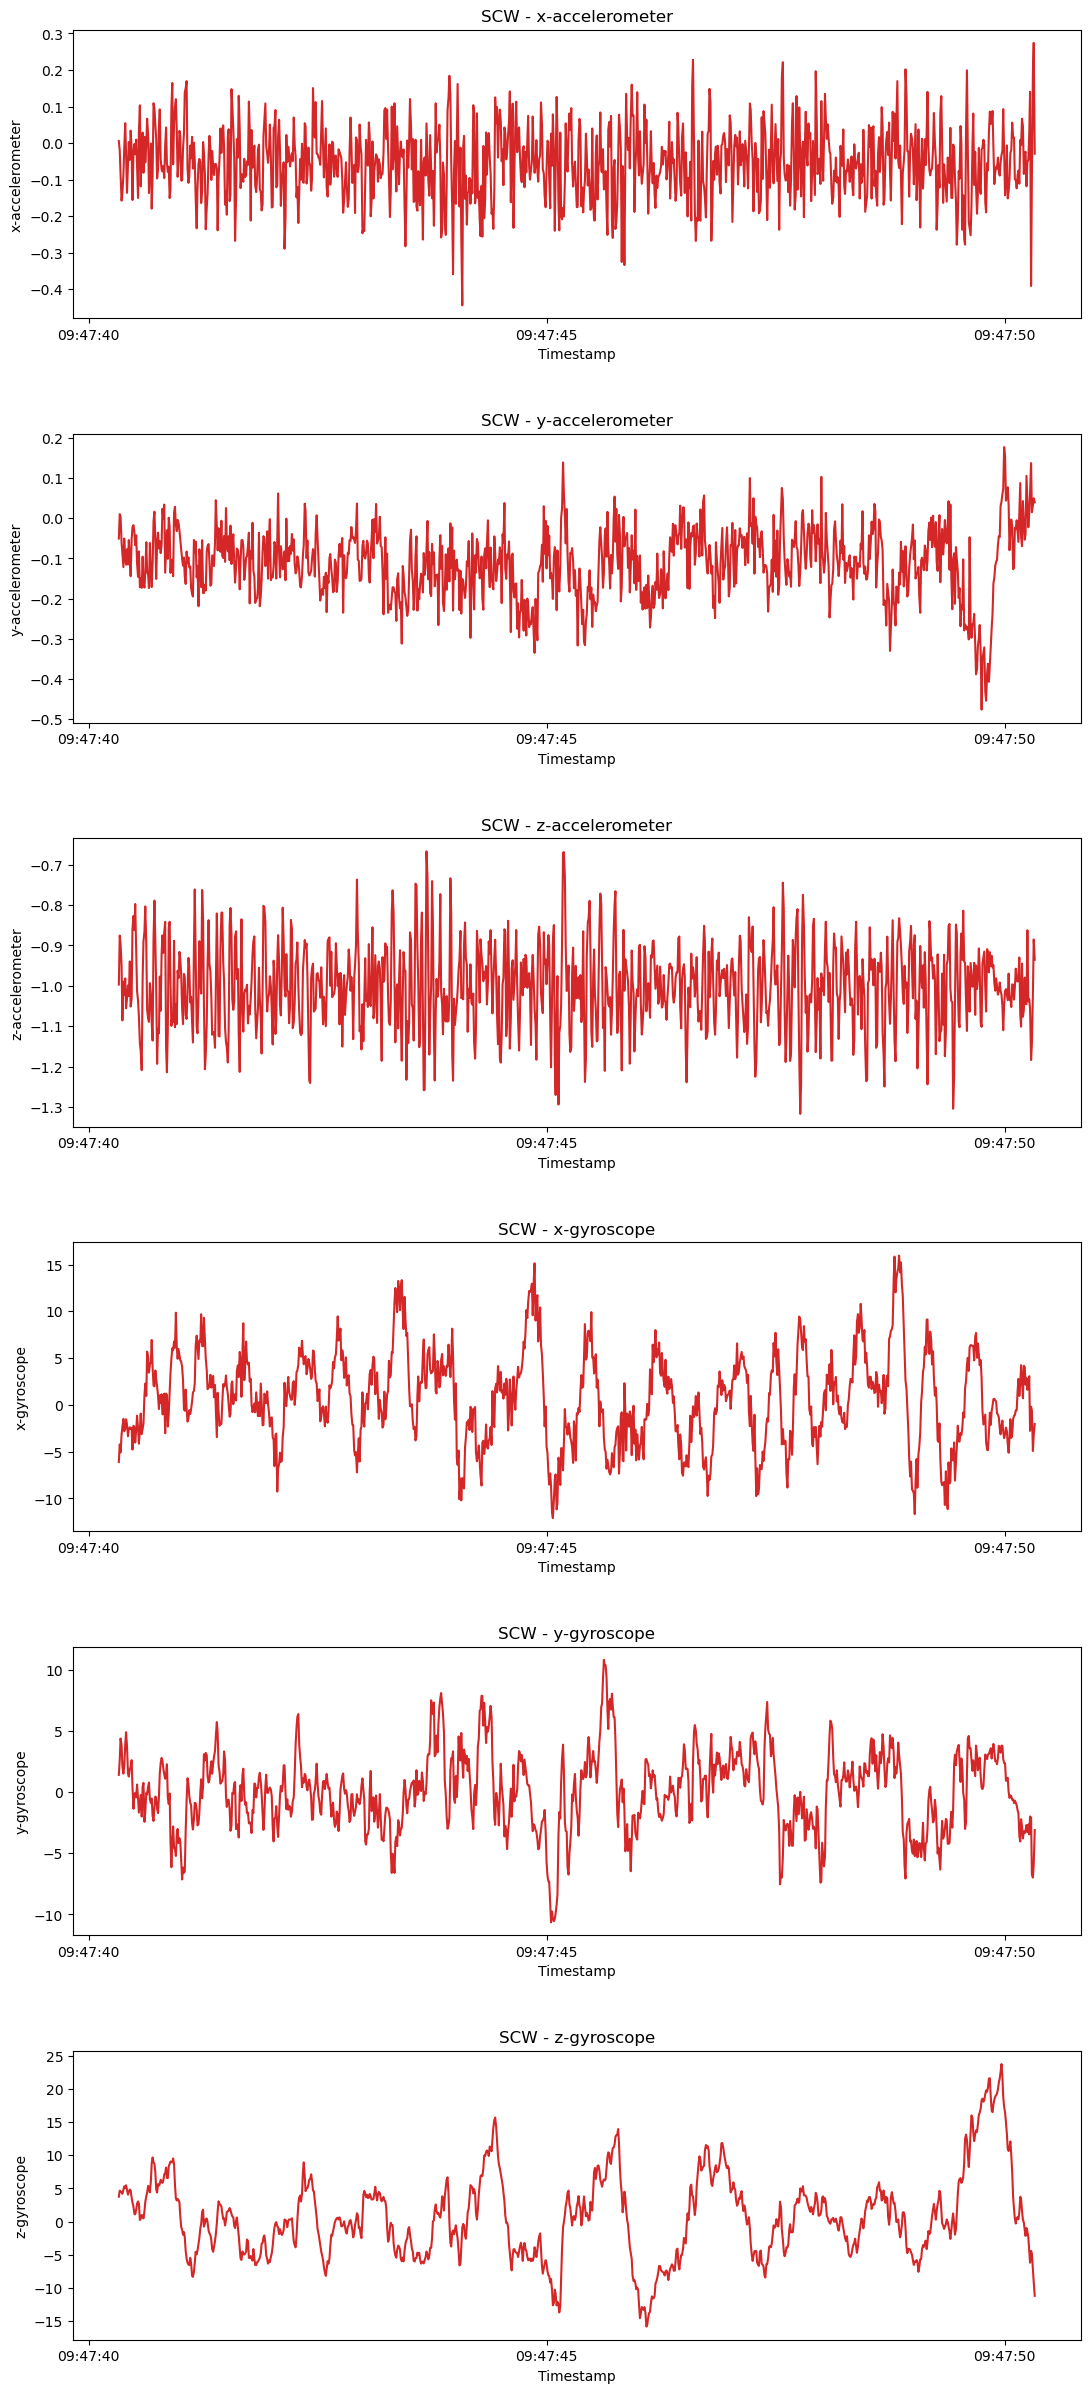

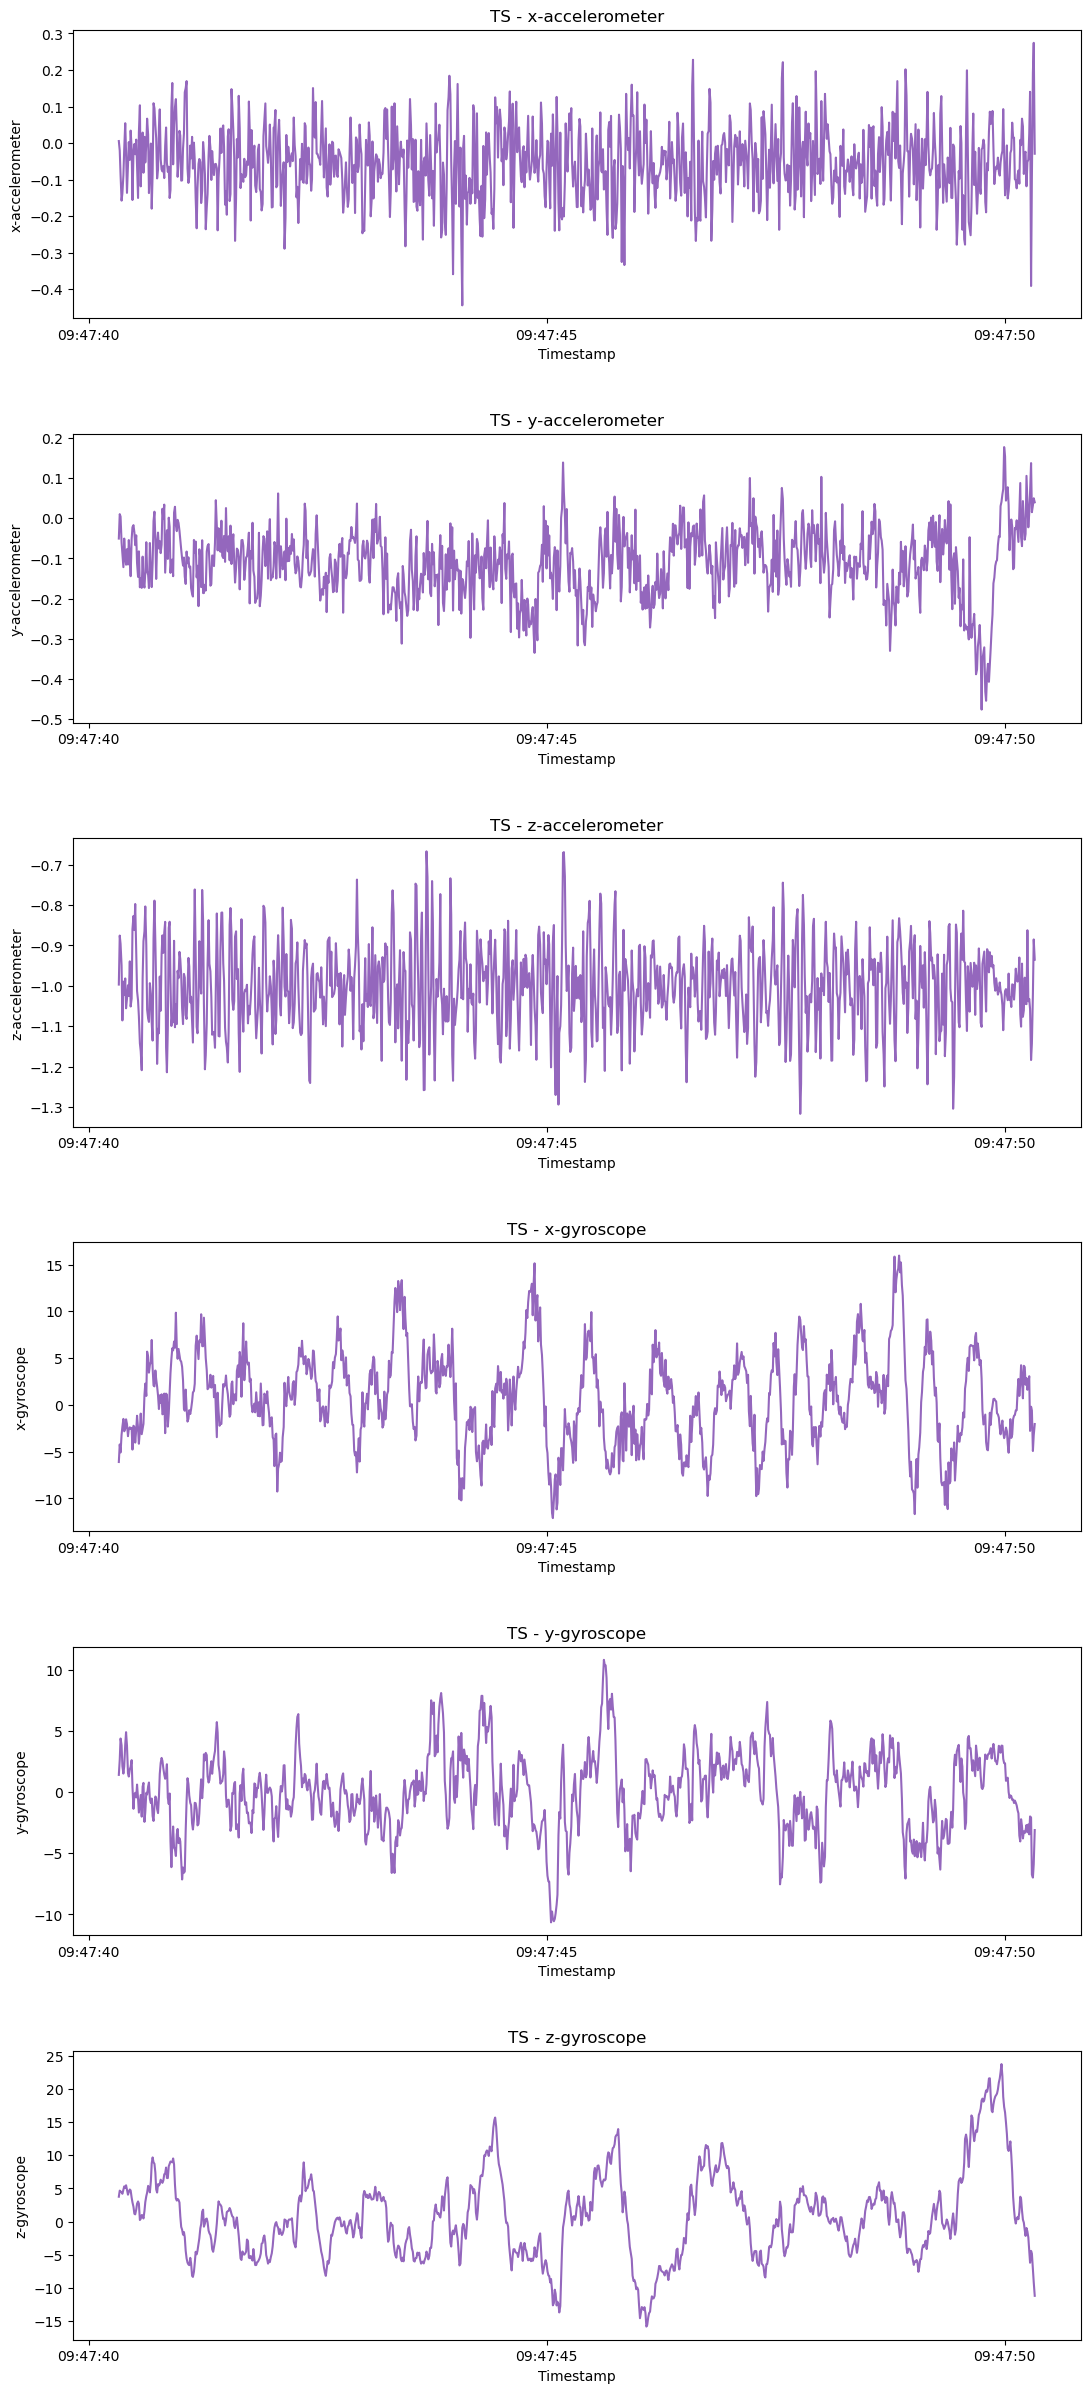

In [25]:
# All plots at once
import matplotlib # For defining color palette

color_palette = matplotlib.colormaps.get_cmap('tab10') # Define a color palette

for color_index, (table_name, table) in enumerate(dict_of_tables_10_seconds.items()):
    fig, ax = plt.subplots(6, 1, figsize=(13, 30), gridspec_kw={'hspace': 0.4})
    
    for i, feature in enumerate(table.columns[1:], 0):  # Skipping the timestamp column:
        color = color_palette(color_index)  # Get color from the palette
        
        ax[i].plot(table['Timestamp'], table[feature], color=color)
        ax[i].set_title(f'{table_name} - {feature}')  # Adding table_name to the title
        ax[i].set_xlabel('Timestamp')
        ax[i].set_ylabel(feature)
    
    plt.show()


#### Section E-10 Box plot

In [26]:
print('The tables are:')
for item, key in dict_of_tables_10_seconds.items():
    print(item)


The tables are:
GSW
AFW
CDF
SCW
TS


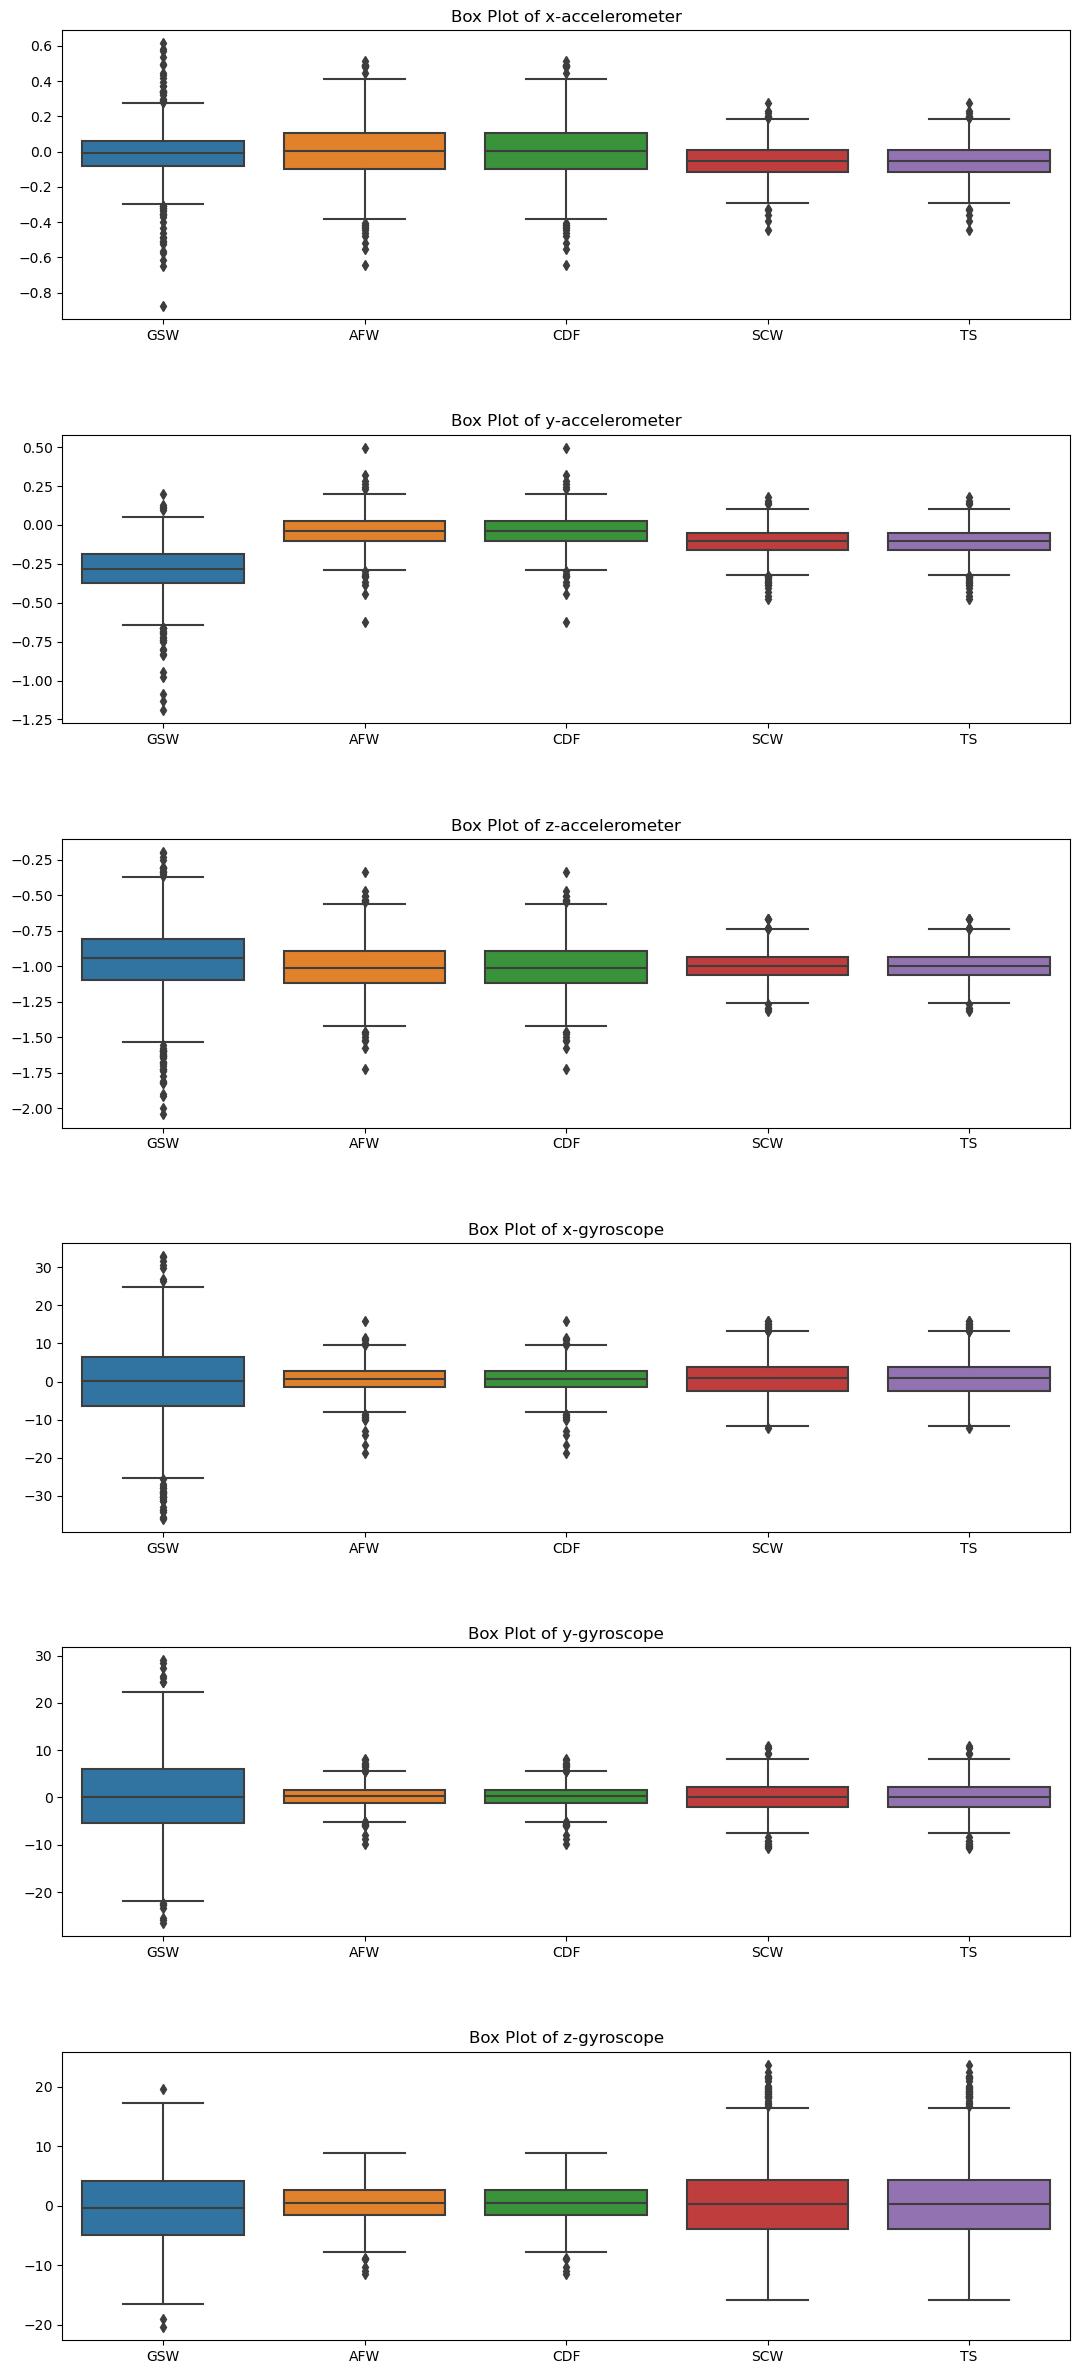

In [27]:
import seaborn as sns  # Importing seaborn for statistical visualization
# Creating a figure and a set of subplots with 6 rows and 1 column, adjusting the figure size and spacing between subplots
fig, ax = plt.subplots(6, 1, figsize=(13, 30), gridspec_kw={'hspace': 0.4})

# Extracting the features to plot from the 'GSW' DataFrame
features_to_plot = dict_of_tables_10_seconds['GSW'].columns[1:]

# Iterating over each feature to plot
for i, feature in enumerate(features_to_plot, 0):
    
    # Creating a DataFrame containing the values of the current feature for each team
    data_to_plot = pd.DataFrame({'GSW': dict_of_tables_10_seconds['GSW'][feature],
                                 'AFW': dict_of_tables_10_seconds['AFW'][feature],
                                 'CDF': dict_of_tables_10_seconds['CDF'][feature],
                                 'SCW': dict_of_tables_10_seconds['SCW'][feature],
                                 'TS': dict_of_tables_10_seconds['TS'][feature]})
    
    # Creating a box plot for the current feature using seaborn, specifying the subplot for plotting
    sns.boxplot(data=data_to_plot, ax=ax[i])
    
    # Setting the x-axis ticks and labels to indicate the teams
    ax[i].set_xticks([0, 1, 2, 3, 4])
    ax[i].set_xticklabels(['GSW', 'AFW', 'CDF', 'SCW', 'TS'])
    
    # Setting the title for the subplot indicating the type of plot and the feature being plotted
    ax[i].set_title(f'Box Plot of {feature}')


## Section F - Data Preprocessing

#### Section F-1 Concatenation and annotation

In [28]:
# Initialize an empty list to store concatenated DataFrames
concatenated_dfs = []

# Iterate through the dictionary of tables
for table_name, table in dict_of_tables.items():
    # Add a new column 'label' with the table name
    table = table.copy() # Make a new copy to mute warnings 
    
    table.loc[:, 'Surface_Type'] = table_name
    # Append the DataFrame to the list
    concatenated_dfs.append(table)

# Concatenate all DataFrames in the list
concatenated_df = pd.concat(concatenated_dfs, ignore_index=True)



In [29]:
concatenated_df.sample(10) # take random 10 rows to check the labels

Timestamp  x-accelerometer  y-accelerometer  \
827   2024-03-21 13:47:16.590         0.613770        -0.079590   
9321  2024-03-20 10:28:07.470         0.076660         0.060303   
11120 2024-03-20 10:28:25.420         0.010254        -0.075928   
11467 2024-03-20 10:28:28.879         0.013916        -0.073975   
8810  2024-03-20 10:28:02.370         0.489502         0.018555   
7413  2024-03-20 10:27:48.430         0.041748        -0.155762   
8981  2024-03-20 10:28:04.069         0.001465        -0.207520   
14734 2024-03-20 09:48:09.869         0.031982        -0.100342   
1586  2024-03-21 13:47:24.159         0.053955        -0.035400   
14067 2024-03-20 09:48:03.220         0.084717        -0.036865   

       z-accelerometer  x-gyroscope  y-gyroscope  z-gyroscope Surface_Type  
827          -1.209473     8.743286   -22.705076     5.355834          GSW  
9321         -0.780273     6.103515     3.784179     1.495361          CDF  
11120        -1.008301     0.732422     0.152588     0.274658          CDF  
11467        -1.012207     0.640869     0.381470    -0.030518          CDF  
8810         -1.137939     6.683349    -6.179809     6.393432          CDF  
7413         -0.856201    -4.730225     0.015259     4.272461          CDF  
8981         -1.497070     2.319336     0.839233    -4.959106          CDF  
14734        -1.354004    10.055541   -11.993407   -14.892577          SCW  
1586         -0.884277    23.620604     8.453369    -9.643555          GSW  
14067        -1.050293    -0.503540    -1.541138    -1.495361          SCW

#### Section F-2 Merging Tables


##### Previously, we analyzed only a portion of the data collected by one team member. Now, we will combine all the data gathered by every team member for our analysis.

In [30]:
# Grass Slopy Wet Surface DataFrame
GSW = pd.read_csv('../datasets/final/GSW.csv')

# Asphalt Flat Wet Surface DataFrame
AFW = pd.read_csv('../datasets/final/AFW.csv') 

# Concerete Dry Flat Surface DataFrame
CFD = pd.read_csv('../datasets/final/CFD.csv') 

# Stones Coarse Wet Surface DataFrame
SCW = pd.read_csv('../datasets/final/SCW.csv')

# Tile Smooth Surface DataFrame
TS = pd.read_csv('../datasets/final/TS.csv')

In [31]:
# Defining the dictionary of tables we have to easily access them later on

# Dictionary = {'key':'Item'}
dict_of_completed_tables = {'GSW': GSW, 'AFW': AFW, 'CFD': CFD, 'SCW': SCW, 'TS': TS}

In [32]:
# concatenate all tables tegother

masterList = []

for table_name, table in dict_of_completed_tables.items():
    masterList.append(table)

# dict_of_completed_tables['TS']

In [33]:
masterTable = pd.concat(masterList, ignore_index=True)
masterTable

x accelerometer  y accelerometer  z accelerometer    x gyro    y gyro  \
0            -0.028809        -0.299805        -0.958252  1.281738  1.068115   
1            -0.016357        -0.300293        -0.949219  1.373291  0.991821   
2            -0.023438        -0.287109        -0.953125  1.068115  0.717163   
3            -0.027832        -0.287354        -0.948730  0.839233  0.335693   
4             0.001465        -0.277832        -0.946533  0.946045  0.183105   
...                ...              ...              ...       ...       ...   
72726         0.016602        -0.080322        -0.970215  1.251221  0.396728   
72727        -0.008789        -0.092773        -1.009033  1.617432  0.656128   
72728         0.013428        -0.066162        -0.994141  1.907349  0.717163   
72729        -0.018311        -0.072998        -1.035645  1.754761  0.686645   
72730        -0.002197        -0.045898        -1.023193  1.922607  0.106812   

         z gyro surface  
0      4.928589   grass  
1      5.004883   grass  
2      4.745483   grass  
3      4.699707   grass  
4      4.608154   grass  
...         ...     ...  
72726  2.548218    tile  
72727  3.036499    tile  
72728  3.158569    tile  
72729  2.975464    tile  
72730  3.265381    tile  

[72731 rows x 7 columns]

#### Section F-3 Checking consistency

In [34]:
# checking if there is missing value
masterTable.isna().sum()

x accelerometer    0
y accelerometer    0
z accelerometer    0
x gyro             0
y gyro             0
z gyro             0
surface            0
dtype: int64

`The dataset does not include any missing values.`

#### Section F - 4 Exploring Values Distribution

In [35]:
masterTable.describe()

x accelerometer  y accelerometer  z accelerometer        x gyro  \
count     72731.000000     72731.000000     72731.000000  72731.000000   
mean         -0.018446        -0.091302        -1.000986      0.629918   
std           0.110704         0.122685         0.127179      5.379880   
min          -0.909912        -1.190186        -2.301758    -54.412838   
25%          -0.079102        -0.139404        -1.061279     -1.007080   
50%          -0.017334        -0.069092        -1.001465      0.747681   
75%           0.038086        -0.018066        -0.937744      2.593994   
max           1.026123         0.534912        -0.100342     38.436890   

             y gyro        z gyro  
count  72731.000000  72731.000000  
mean       0.248119      0.074384  
std        3.751903      6.441651  
min      -35.552979    -66.802979  
25%       -0.976562     -2.288818  
50%        0.244141      0.030518  
75%        1.480102      2.441406  
max       47.164913     81.130974

`We noticed that there are variability in the distribution of numerical features`

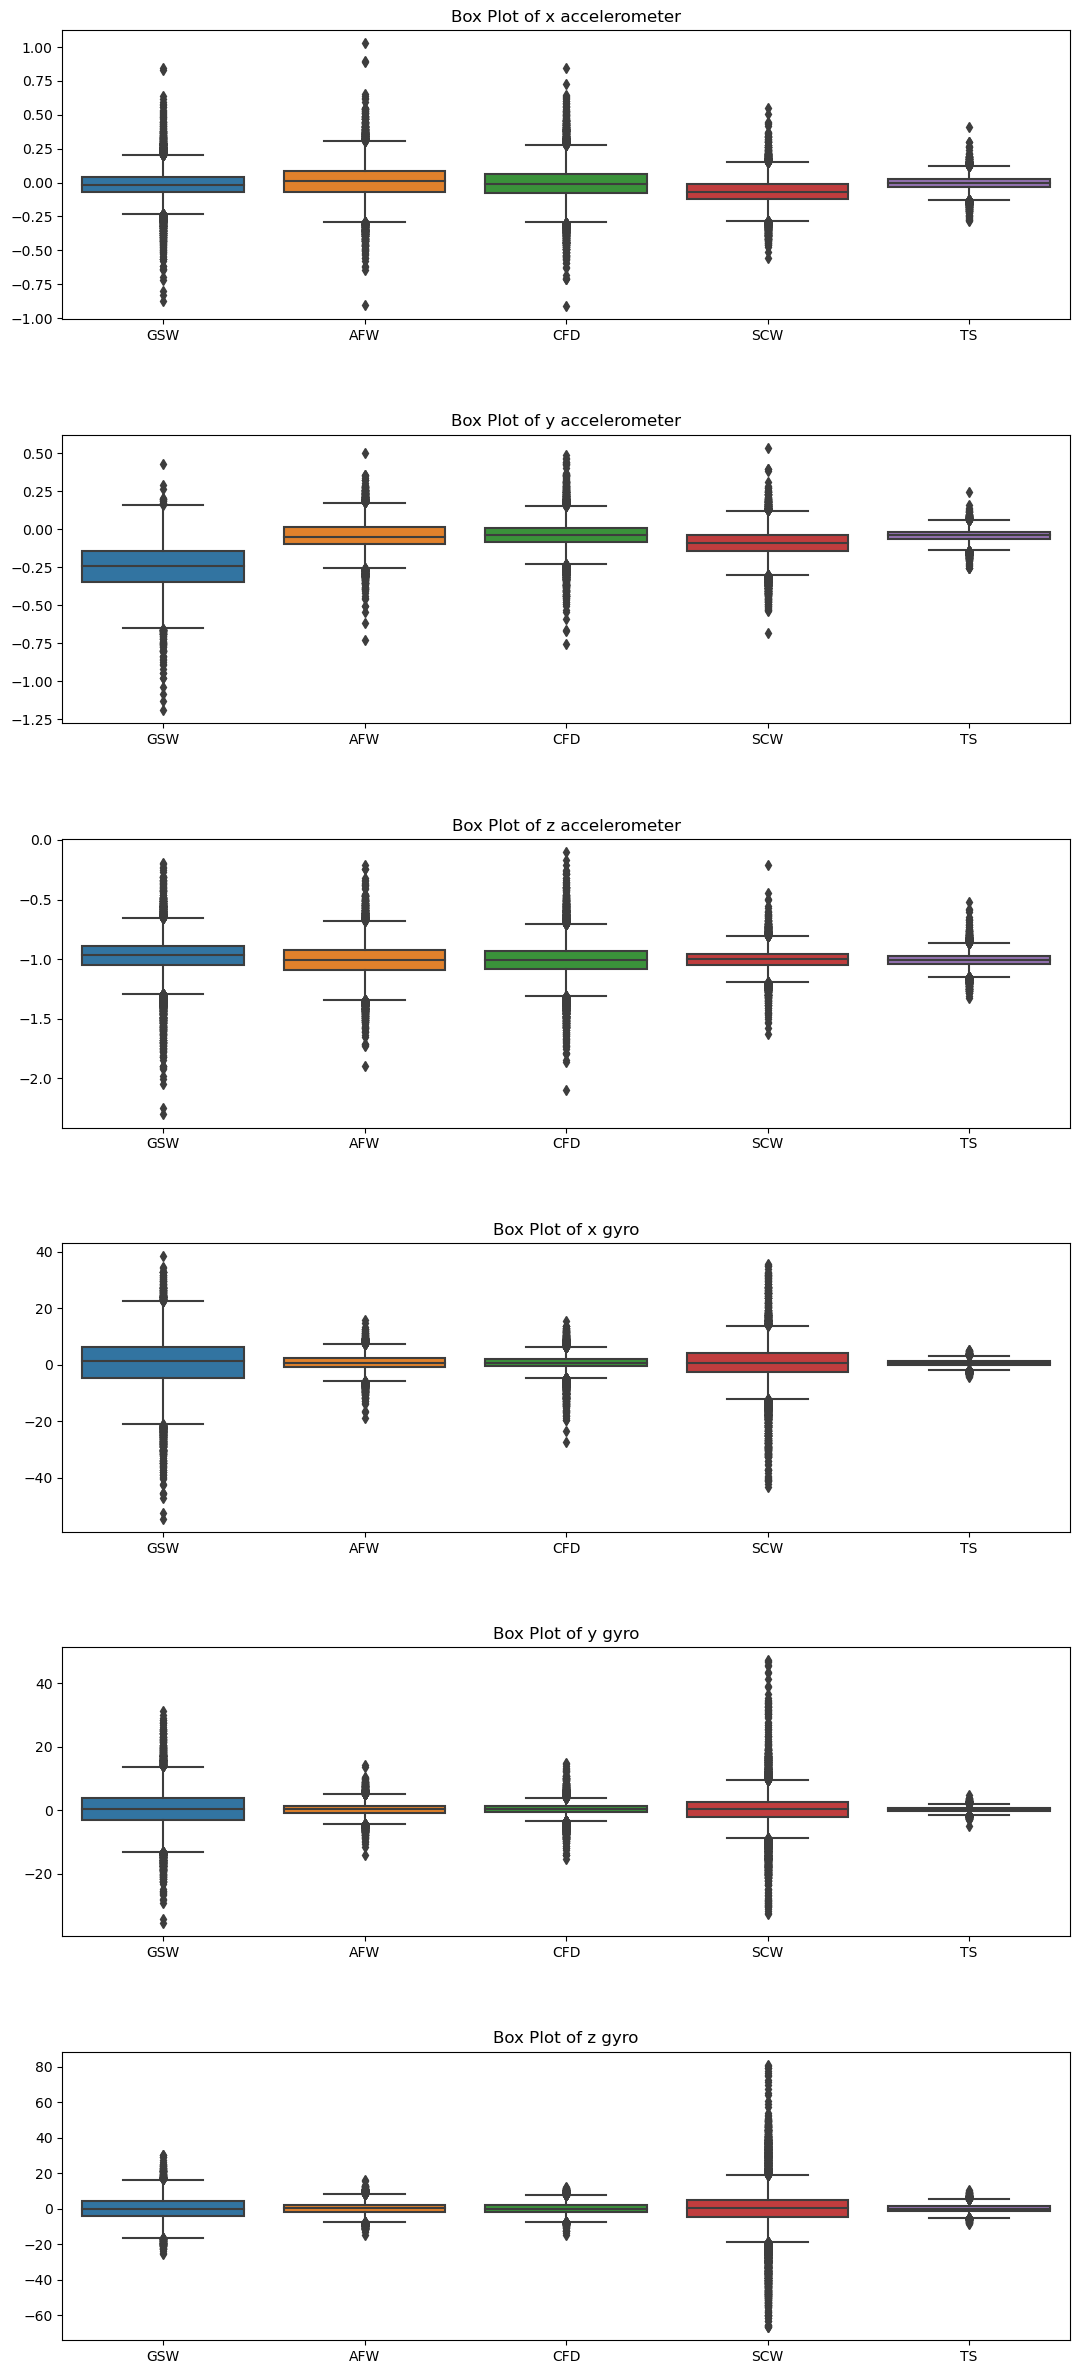

In [36]:
# Creating a figure and a set of subplots with 6 rows and 1 column, adjusting the figure size and spacing between subplots
fig, ax = plt.subplots(6, 1, figsize=(13, 30), gridspec_kw={'hspace': 0.4})

# Extracting the features to plot from the 'GSW' DataFrame
features_to_plot = dict_of_completed_tables['GSW'].columns[:6] # SLIGHT MODIFICATION HERE

# Iterating over each feature to plot
for i, feature in enumerate(features_to_plot, 0):
    
    # Creating a DataFrame containing the values of the current feature for each team
    data_to_plot = pd.DataFrame({'GSW': dict_of_completed_tables['GSW'][feature],
                                 'AFW': dict_of_completed_tables['AFW'][feature],
                                 'CFD': dict_of_completed_tables['CFD'][feature],
                                 'SCW': dict_of_completed_tables['SCW'][feature],
                                 'TS': dict_of_completed_tables['TS'][feature]})
    
    # Creating a box plot for the current feature using seaborn, specifying the subplot for plotting
    sns.boxplot(data=data_to_plot, ax=ax[i])
    
    # Setting the x-axis ticks and labels to indicate the teams
    ax[i].set_xticks([0, 1, 2, 3, 4])
    ax[i].set_xticklabels(['GSW', 'AFW', 'CFD', 'SCW', 'TS'])
    
    # Setting the title for the subplot indicating the type of plot and the feature being plotted
    ax[i].set_title(f'Box Plot of {feature}')


`1 - We observe that the independent features have varying scales. Therefore, we will utilize scaling techniques to address this variability.`

`2 - We notice that the values consist of both negative and positive values, indicating that scaling using the StandardScaler is preferable over MinMax Scaling.`

`3 - The axes of the gyroscope exhibit larger standard deviations, suggesting that these features may have strong predictability for the target feature.`

#### Section F - 5 Exploring Clusters for all dimensions 

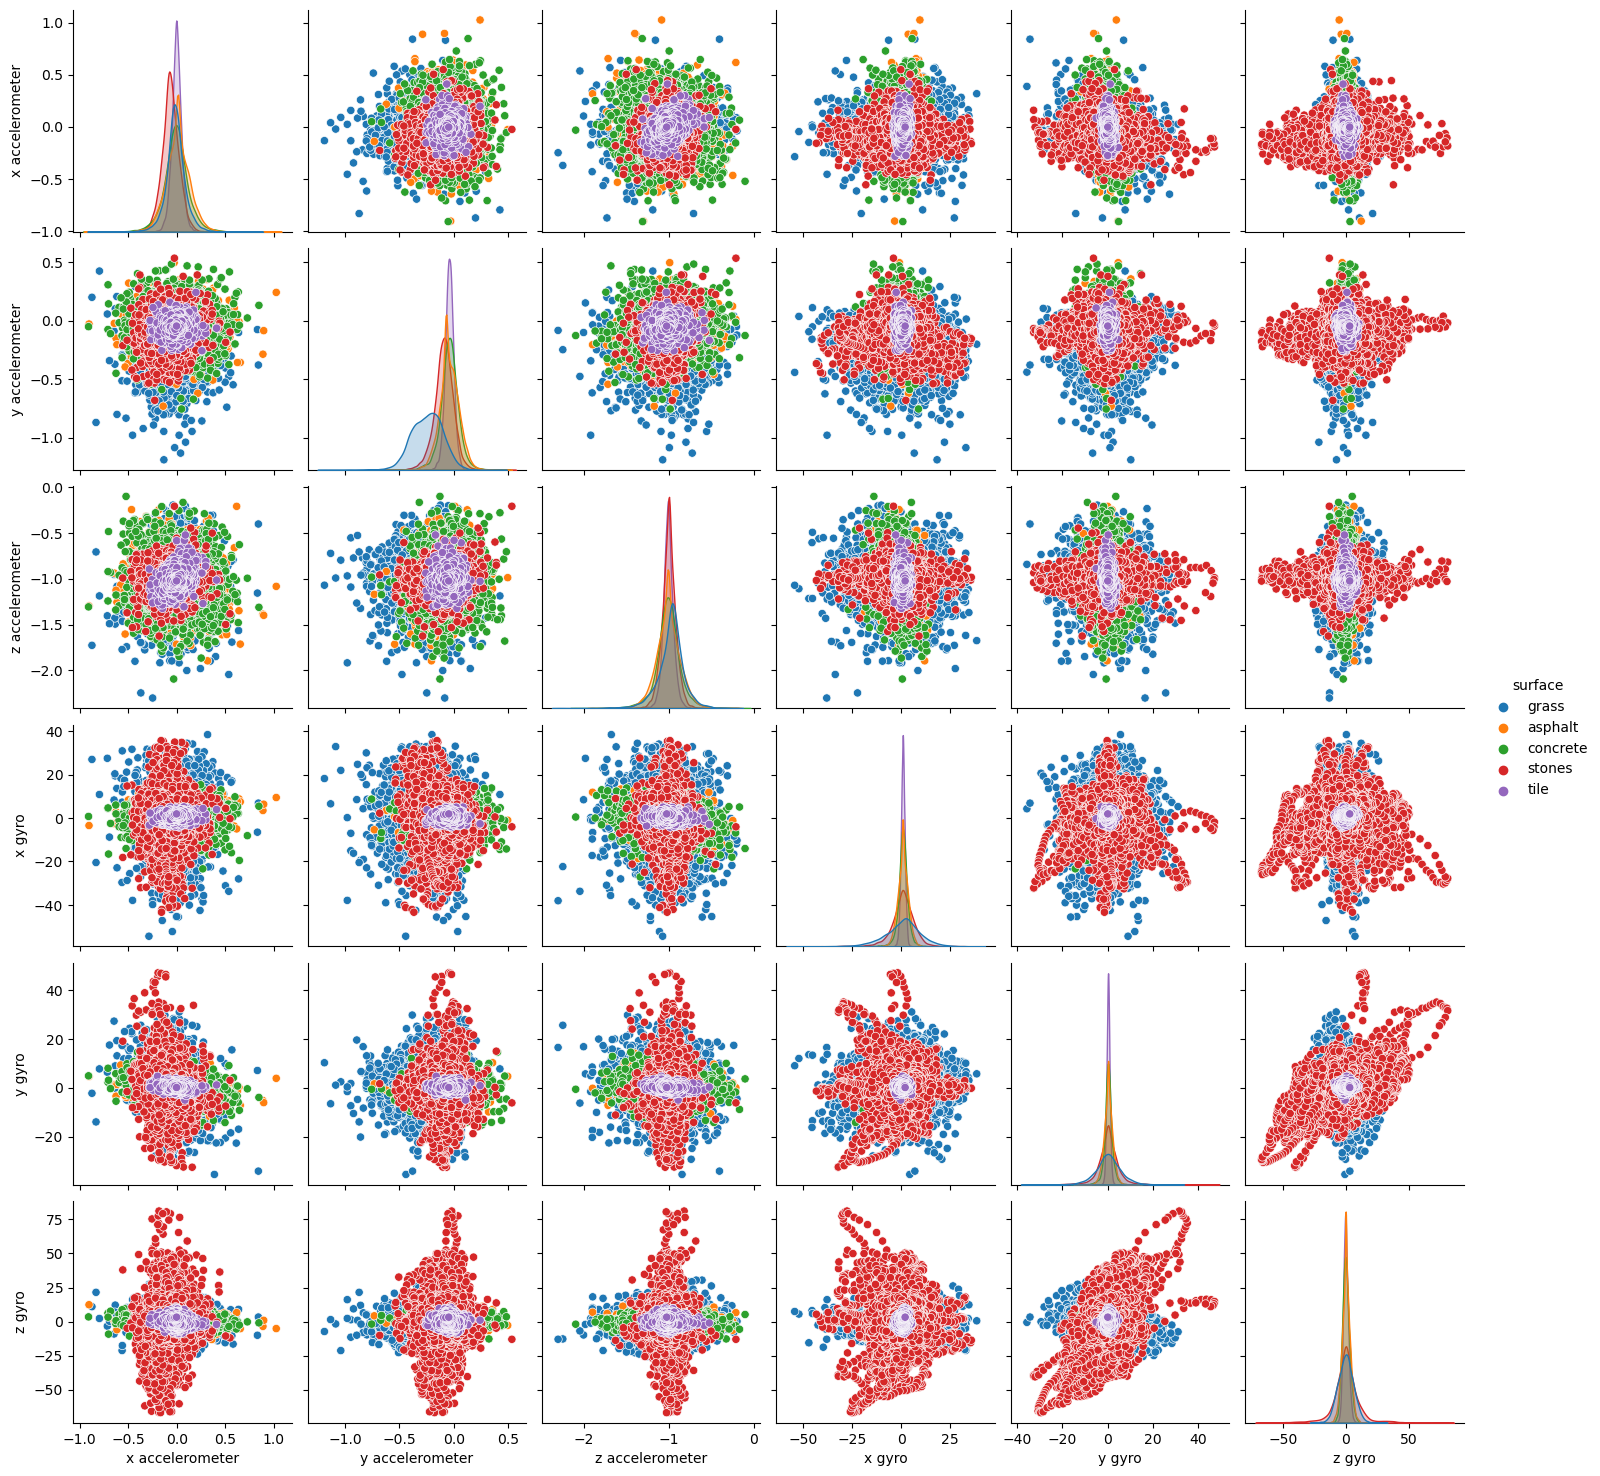

In [38]:
# see the distribtuion of features for each class (Surface)
import seaborn as sns # (if needed)
sns.pairplot(masterTable, hue='surface')
plt.show()


`The pairplot demonstrates distinguishable patterns between the different classes, indicating that applying classification using machine learning is possible. However, it's noteworthy that the asphalt class does not exhibit a unique pattern that is distinctly different from the other classes using the current features`

#### Section F - 5.5 Exploring Clusters on 2-D dimensions using PCA

In [37]:
# Take a copy to do clustering analysis using Principal component analysis
Cluster_data = masterTable.copy()

In [38]:
# calling the cluster data we copied eariler
Cluster_data

x accelerometer  y accelerometer  z accelerometer    x gyro    y gyro  \
0            -0.028809        -0.299805        -0.958252  1.281738  1.068115   
1            -0.016357        -0.300293        -0.949219  1.373291  0.991821   
2            -0.023438        -0.287109        -0.953125  1.068115  0.717163   
3            -0.027832        -0.287354        -0.948730  0.839233  0.335693   
4             0.001465        -0.277832        -0.946533  0.946045  0.183105   
...                ...              ...              ...       ...       ...   
72726         0.016602        -0.080322        -0.970215  1.251221  0.396728   
72727        -0.008789        -0.092773        -1.009033  1.617432  0.656128   
72728         0.013428        -0.066162        -0.994141  1.907349  0.717163   
72729        -0.018311        -0.072998        -1.035645  1.754761  0.686645   
72730        -0.002197        -0.045898        -1.023193  1.922607  0.106812   

         z gyro surface  
0      4.928589   grass  
1      5.004883   grass  
2      4.745483   grass  
3      4.699707   grass  
4      4.608154   grass  
...         ...     ...  
72726  2.548218    tile  
72727  3.036499    tile  
72728  3.158569    tile  
72729  2.975464    tile  
72730  3.265381    tile  

[72731 rows x 7 columns]

In [39]:
Cluster_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72731 entries, 0 to 72730
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   x accelerometer  72731 non-null  float64
 1   y accelerometer  72731 non-null  float64
 2   z accelerometer  72731 non-null  float64
 3   x gyro           72731 non-null  float64
 4   y gyro           72731 non-null  float64
 5   z gyro           72731 non-null  float64
 6   surface          72731 non-null  object 
dtypes: float64(6), object(1)
memory usage: 3.9+ MB


In [40]:
from sklearn.preprocessing import StandardScaler # to unify the scales of the columns
from sklearn.decomposition import PCA # To reduce data into 2-d dimensions only

from sklearn.cluster import KMeans # to cluster the data 
import matplotlib.pyplot as plt # to plotting

In [41]:
# Standardize the data
numerical_columns = Cluster_data.drop('surface', axis=1) # Exclude the label column from scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_columns)  # To unify the impact of each column

In [42]:
# Apply PCA to reduce dimensionality
pca = PCA(n_components=2) # reducing data into 2-d dimension 
pca_data = pca.fit_transform(scaled_data)

In [43]:
# Apply k-means clustering
kmeans = KMeans(n_clusters=5)  # setting number of clusters to 5
kmeans.fit(pca_data)
clusters = kmeans.predict(pca_data)


/Users/bushrajalali/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [44]:
labels = Cluster_data['surface'] # the array of labels that will be used to highlight the cluster plots
unique_labels = labels.unique()

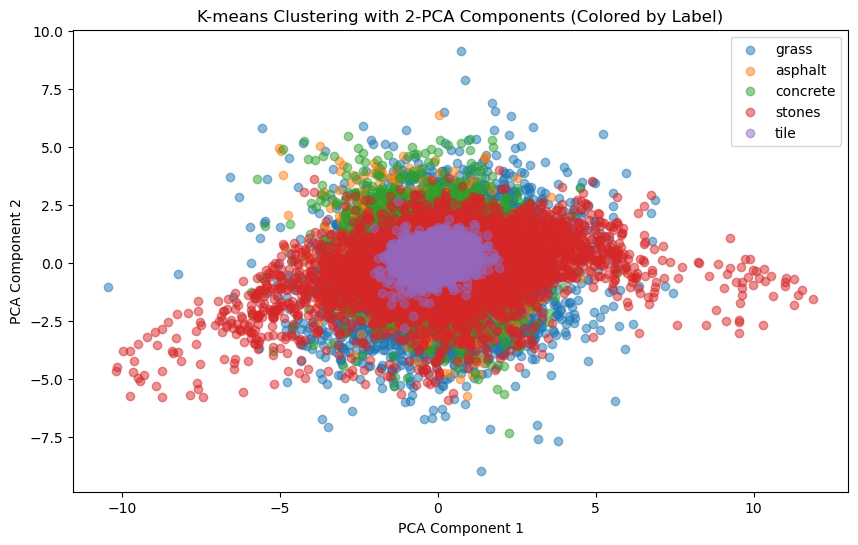

In [45]:
# Plot the clustered data with colors based on the label column

# Create a new figure for the plot
plt.figure(figsize=(10, 6))

# Iterate over each unique label
for label in unique_labels:
    # Select the data points corresponding to the current label and plot them
    plt.scatter(pca_data[labels == label, 0], pca_data[labels == label, 1], label=label, alpha=0.5)

# Set the title and axis labels for the plot
plt.title('K-means Clustering with 2-PCA Components (Colored by Label)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Display the legend to show the mapping between labels and colors
plt.legend()

# Show the plot
plt.show()


`The current plot implies that we need more features to distinguish between surfaces patterns, which can be done later on using rolling window technique`

#### section F-6 studying the dependent feature

In [46]:
masterTable.surface.value_counts()

stones      16224
asphalt     15982
concrete    14802
grass       13343
tile        12380
Name: surface, dtype: int64

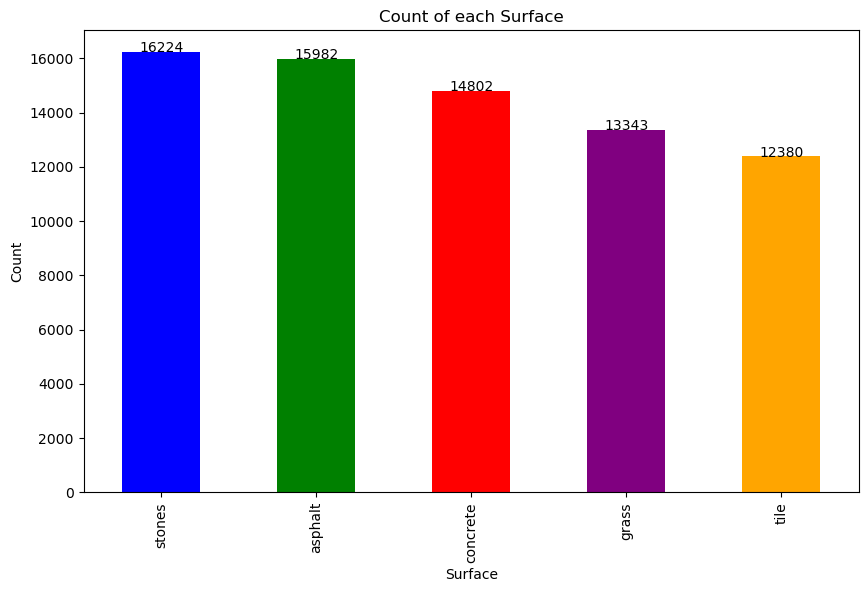

In [47]:
# masterTable.surface.value_counts() returns a Series with surface names as index and their counts as values
counts = masterTable.surface.value_counts()

# Define colors for each surface
colors = ['blue', 'green', 'red', 'purple', 'orange']  

# Plotting
plt.figure(figsize=(10, 6))  # Adjusting figure size
counts.plot(kind='bar', color=colors)

# Adding labels and title
plt.xlabel('Surface')
plt.ylabel('Count')
plt.title('Count of each Surface')

# Adding total count on top of each bar
for i, count in enumerate(counts):
    plt.text(i, count + 0.5, str(count), ha='center')

# Show plot
plt.show()


`The distribution of target feature is almost balanced, which is a good indicator that there is no need to use re-balancing techniques`

#### Section F - 7 Calculating Vectors Magnitudes

In [48]:
masterTable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72731 entries, 0 to 72730
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   x accelerometer  72731 non-null  float64
 1   y accelerometer  72731 non-null  float64
 2   z accelerometer  72731 non-null  float64
 3   x gyro           72731 non-null  float64
 4   y gyro           72731 non-null  float64
 5   z gyro           72731 non-null  float64
 6   surface          72731 non-null  object 
dtypes: float64(6), object(1)
memory usage: 3.9+ MB


In [49]:
# Calculate accelerometer magnitude
masterTable['accelerometer_magnitude'] = np.sqrt(masterTable['x accelerometer']**2 + 
                                                  masterTable['y accelerometer']**2 + 
                                                  masterTable['z accelerometer']**2)

# Calculate gyro magnitude
masterTable['gyro_magnitude'] = np.sqrt(masterTable['x gyro']**2 + 
                                         masterTable['y gyro']**2 + 
                                         masterTable['z gyro']**2)

# Verify the changes
masterTable.head()


x accelerometer  y accelerometer  z accelerometer    x gyro    y gyro  \
0        -0.028809        -0.299805        -0.958252  1.281738  1.068115   
1        -0.016357        -0.300293        -0.949219  1.373291  0.991821   
2        -0.023438        -0.287109        -0.953125  1.068115  0.717163   
3        -0.027832        -0.287354        -0.948730  0.839233  0.335693   
4         0.001465        -0.277832        -0.946533  0.946045  0.183105   

     z gyro surface  accelerometer_magnitude  gyro_magnitude  
0  4.928589   grass                 1.004470        5.203337  
1  5.004883   grass                 0.995721        5.283795  
2  4.745483   grass                 0.995705        4.916788  
3  4.699707   grass                 0.991683        4.785838  
4  4.608154   grass                 0.986467        4.707825

In [50]:
masterTable.describe()

x accelerometer  y accelerometer  z accelerometer        x gyro  \
count     72731.000000     72731.000000     72731.000000  72731.000000   
mean         -0.018446        -0.091302        -1.000986      0.629918   
std           0.110704         0.122685         0.127179      5.379880   
min          -0.909912        -1.190186        -2.301758    -54.412838   
25%          -0.079102        -0.139404        -1.061279     -1.007080   
50%          -0.017334        -0.069092        -1.001465      0.747681   
75%           0.038086        -0.018066        -0.937744      2.593994   
max           1.026123         0.534912        -0.100342     38.436890   

             y gyro        z gyro  accelerometer_magnitude  gyro_magnitude  
count  72731.000000  72731.000000             72731.000000    72731.000000  
mean       0.248119      0.074384                 1.019045        6.495954  
std        3.751903      6.441651                 0.125216        6.540692  
min      -35.552979    -66.802979                 0.225849        0.037377  
25%       -0.976562     -2.288818                 0.956737        2.507321  
50%        0.244141      0.030518                 1.012999        4.499402  
75%        1.480102      2.441406                 1.075169        8.132247  
max       47.164913     81.130974                 2.316651       91.487770

`Moving forward, we will use the magnitude columns in the sliding window process and in training of the classification models, below is the last dataset by the team`

In [51]:
# updating masterTable to be the agreed upon dataset by the team
masterTable = pd.read_csv('../datasets/Bushra/imu_data.csv')

In [52]:
masterTable

accelerometer      gyro  surface
0           0.903738  1.698736  asphalt
1           0.834571  2.051725  asphalt
2           1.160288  0.895211  asphalt
3           1.106549  1.276459  asphalt
4           0.931808  4.475666  asphalt
...              ...       ...      ...
71594       0.973676  2.866420     tile
71595       1.013327  3.502416     tile
71596       0.996431  3.758838     tile
71597       1.038376  3.521939     tile
71598       1.024224  3.790849     tile

[71599 rows x 3 columns]

#### Section F - 8 Aggregating numerical features using sliding window technique 

In [53]:
window_data = masterTable.copy()
window_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71599 entries, 0 to 71598
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   accelerometer  71599 non-null  float64
 1   gyro           71599 non-null  float64
 2   surface        71599 non-null  object 
dtypes: float64(2), object(1)
memory usage: 1.6+ MB


In [54]:
# Define the window size
window_size = 100

# Initialize an empty list to store the rolling metric tables for each surface
rolling_metric_tables = []

# Get unique surfaces
unique_surfaces = window_data['surface'].unique()



In [55]:
unique_surfaces

array(['asphalt', 'concrete', 'grass', 'stones', 'tile'], dtype=object)

In [56]:
# Loop through each surface
for surface in unique_surfaces:
    # Filter data for the current surface
    surface_data = window_data[window_data['surface'] == surface]
    
    # Calculate rolling mean, std, and skewness for numeric columns for the current surface
    rolling_metrics_surface = surface_data.drop(columns='surface').rolling(window=window_size).agg(['mean', 'std', lambda x: pd.Series(x).skew(), lambda x: pd.Series(x).kurt()])
    
    
    # Add a new column containing the surface name
    rolling_metrics_surface['surface'] = surface
    
    # Append the rolling metric table for the current surface to the list
    rolling_metric_tables.append(rolling_metrics_surface)




In [57]:
# Concatenate the rolling metric tables for all surfaces
rolling_metrics_all_surfaces = pd.concat(rolling_metric_tables)

# Display the resulting DataFrame
display(rolling_metrics_all_surfaces)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

accelerometer                                    gyro            \
               mean       std  <lambda>  <lambda>      mean       std   
0               NaN       NaN       NaN       NaN       NaN       NaN   
1               NaN       NaN       NaN       NaN       NaN       NaN   
2               NaN       NaN       NaN       NaN       NaN       NaN   
3               NaN       NaN       NaN       NaN       NaN       NaN   
4               NaN       NaN       NaN       NaN       NaN       NaN   
...             ...       ...       ...       ...       ...       ...   
71594      1.008516  0.025144  0.155399  0.132617  2.302040  0.852003   
71595      1.008545  0.025148  0.151833  0.129877  2.296439  0.842095   
71596      1.008075  0.024928  0.184189  0.216970  2.293080  0.835494   
71597      1.008479  0.025089  0.150170  0.143403  2.287250  0.824687   
71598      1.008556  0.025126  0.142315  0.124163  2.284724  0.819624   

                           surface  
       <lambda>  <lambda>           
0           NaN       NaN  asphalt  
1           NaN       NaN  asphalt  
2           NaN       NaN  asphalt  
3           NaN       NaN  asphalt  
4           NaN       NaN  asphalt  
...         ...       ...      ...  
71594  0.105482 -0.597494     tile  
71595  0.065281 -0.637146     tile  
71596  0.031648 -0.687766     tile  
71597 -0.020660 -0.757271     tile  
71598 -0.049374 -0.804391     tile  

[71599 rows x 9 columns]

In [58]:
# data = rolling_metrics_all_surfaces.copy()

In [59]:
# rolling_metrics_all_surfaces = data.copy()

In [60]:
rolling_metrics_all_surfaces.columns

MultiIndex([('accelerometer',     'mean'),
            ('accelerometer',      'std'),
            ('accelerometer', '<lambda>'),
            ('accelerometer', '<lambda>'),
            (         'gyro',     'mean'),
            (         'gyro',      'std'),
            (         'gyro', '<lambda>'),
            (         'gyro', '<lambda>'),
            (      'surface',         '')],
           )

In [61]:
# Rename columns for clarity
rolling_metrics_all_surfaces.columns = [f"{col}_{stat}" for col, stat in rolling_metrics_surface.columns]

In [62]:
rolling_metrics_all_surfaces.columns

Index(['accelerometer_mean', 'accelerometer_std', 'accelerometer_<lambda>',
       'accelerometer_<lambda>', 'gyro_mean', 'gyro_std', 'gyro_<lambda>',
       'gyro_<lambda>', 'surface_'],
      dtype='object')

In [63]:
# renaming columns for futher clarity
rolling_metrics_all_surfaces.columns.values[2] = 'accelerometer_Skewness'
rolling_metrics_all_surfaces.columns.values[3] = 'accelerometer_kortsosis'
rolling_metrics_all_surfaces.columns.values[6] = 'gyro_Skewness'
rolling_metrics_all_surfaces.columns.values[7] = 'gyro_kortsosis'
rolling_metrics_all_surfaces.columns.values[8] = 'surface'



In [64]:
rolling_metrics_all_surfaces.columns

Index(['accelerometer_mean', 'accelerometer_std', 'accelerometer_Skewness',
       'accelerometer_kortsosis', 'gyro_mean', 'gyro_std', 'gyro_Skewness',
       'gyro_kortsosis', 'surface'],
      dtype='object')

In [65]:
rolling_metrics_all_surfaces.surface.value_counts()

stones      16224
asphalt     14850
concrete    14802
grass       13343
tile        12380
Name: surface, dtype: int64

In [66]:
rolling_metrics_all_surfaces.dropna(inplace = True) # Removing NA rows 

In [67]:
rolling_metrics_all_surfaces.surface.value_counts()

stones      16125
asphalt     14751
concrete    14703
grass       13244
tile        12281
Name: surface, dtype: int64

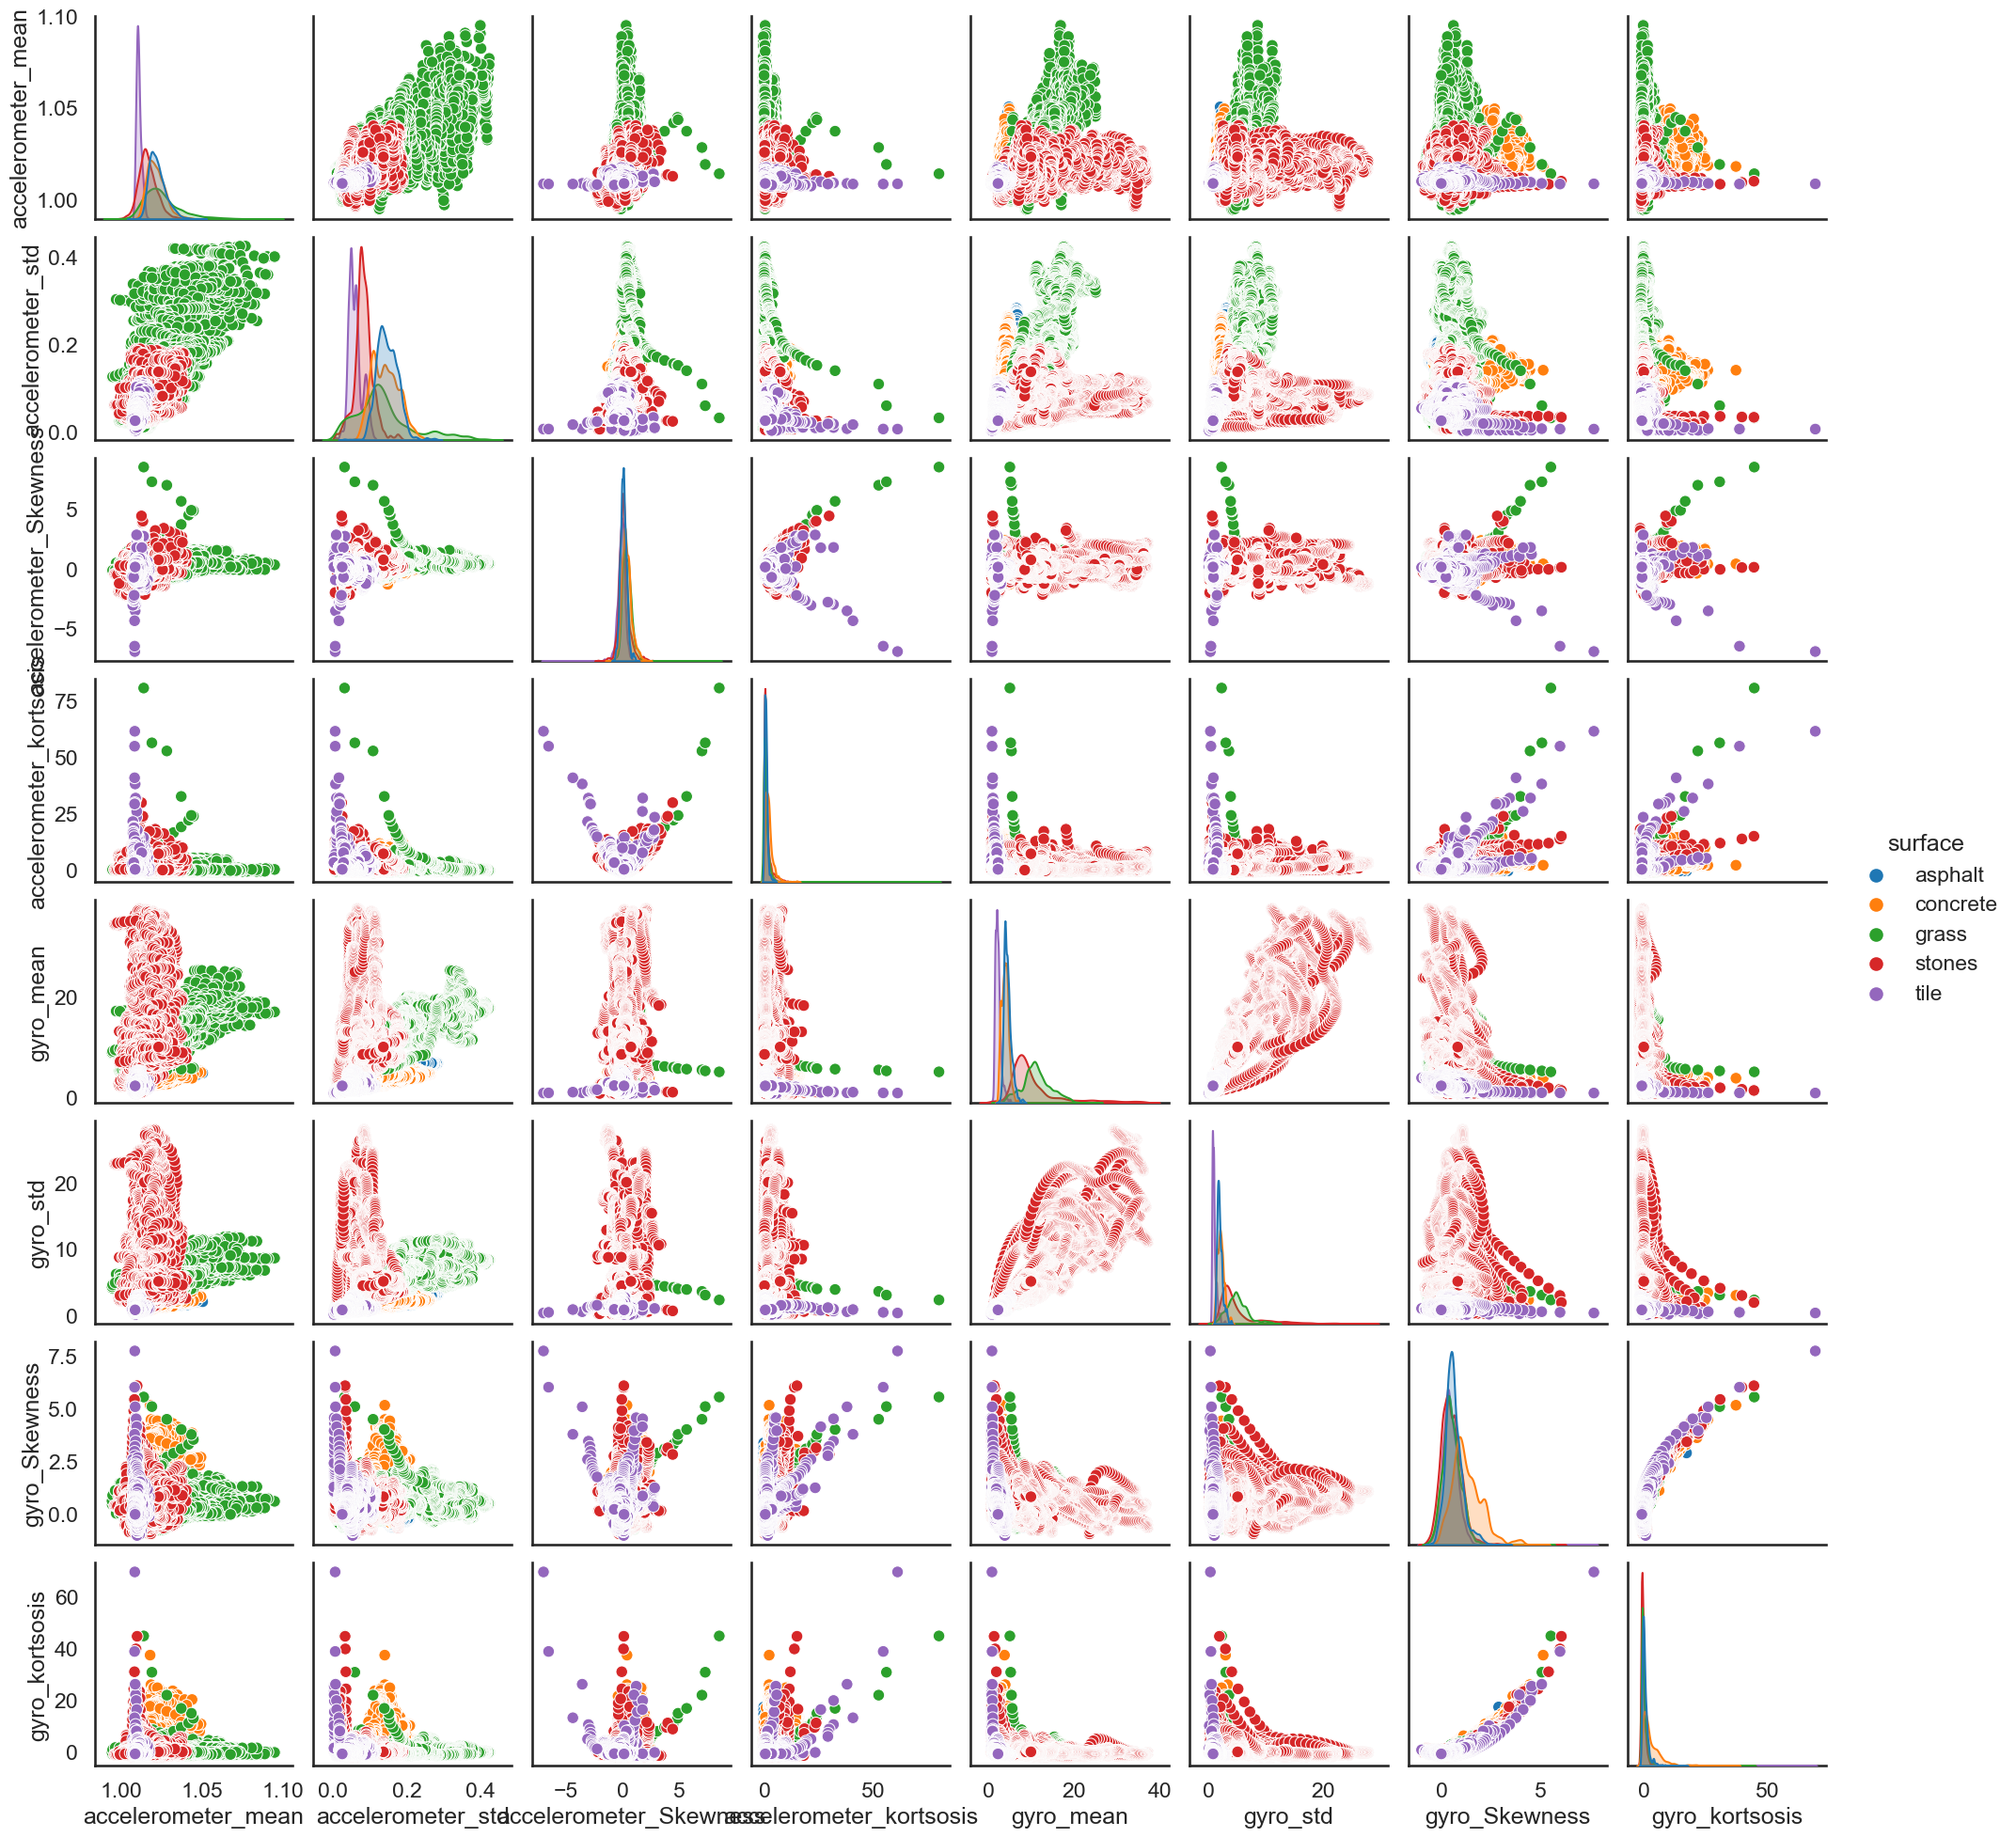

In [144]:
# see the distribtuion of features for each class (Surface)
import seaborn as sns # (if needed)
sns.pairplot(rolling_metrics_all_surfaces, hue='surface')
plt.show()


In [ ]:
# ## Why we have NA rows
# # Create a DataFrame
# data = {'value': [1, 2, 3, 4, 5]}
# df = pd.DataFrame(data)





In [ ]:
# df

In [ ]:
# # Calculate the rolling mean with window size 3
# rolling_mean = df['value'].rolling(window=4).mean()

# rolling_mean

#### Section F - 10 Regular Dataset Mapping target feature (Label-Encoding classes)

In [68]:
# Define the mapping
label_mapping = {
    'tile': 0,
    'grass': 1,
    'asphalt': 2,
    'concrete': 3,
    'stones': 4
}

# Map the labels using the dictionary
masterTable['Encoded_Surface'] = masterTable['surface'].map(label_mapping)

# Display the DataFrame with the new encoded labels
masterTable.sample(5)


accelerometer       gyro  surface  Encoded_Surface
47502       1.102194  11.071763   stones                4
51020       0.995509   8.719820   stones                4
4735        1.134654   1.494270  asphalt                2
59284       1.060954   1.000819     tile                0
32050       0.909013   9.250514    grass                1

In [69]:
# Chkecing that value counts matches
masterTable.Encoded_Surface.value_counts()

4    16224
2    14850
3    14802
1    13343
0    12380
Name: Encoded_Surface, dtype: int64

In [70]:
masterTable.surface.value_counts()

stones      16224
asphalt     14850
concrete    14802
grass       13343
tile        12380
Name: surface, dtype: int64

In [71]:
# now we can remove the string lable 'Surface'
masterTable.drop('surface', axis =1 , inplace = True)

#### Section F - 11 Regular Dataset checking multicollinearity

In [72]:
###
data = masterTable.copy()
# Calculate the correlation values
feature_cols = data.columns[:-1]
corr_values = data[feature_cols].corr()

# Simplify by emptying all the data below the diagonal
tril_index = np.tril_indices_from(corr_values) # The lower triangle

# Make the unused values NaNs
corr_array = np.array(corr_values) # Changing the df to an array
corr_array[tril_index] = np.nan # Assigning the lower traingle to nan
    
# Recreate Pandas correlation data frame
corr_values = pd.DataFrame(corr_array,columns = corr_values.columns, index= corr_values.index)

# Stack the data and convert to a data frame
corr_values = (corr_values
               .stack()
               .to_frame()
               .reset_index()
               .rename(columns={'level_0':'feature1',
                                'level_1':'feature2',
                                0:'correlation'}))

# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()
corr_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   feature1         1 non-null      object 
 1   feature2         1 non-null      object 
 2   correlation      1 non-null      float64
 3   abs_correlation  1 non-null      float64
dtypes: float64(2), object(2)
memory usage: 164.0+ bytes


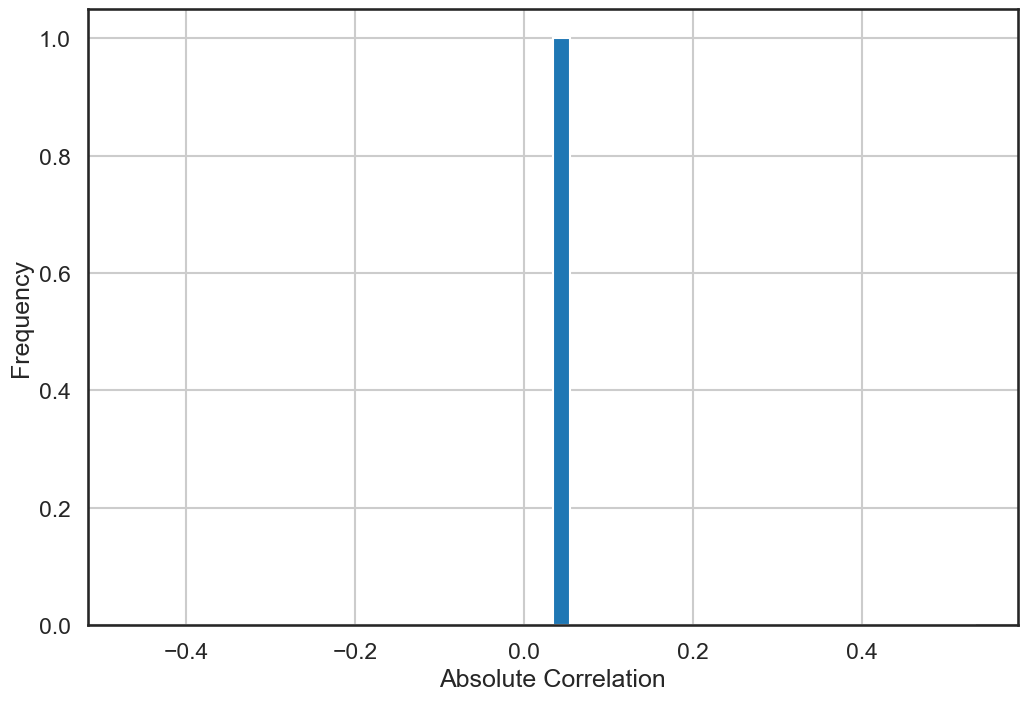

In [73]:
sns.set_context('talk')
sns.set_style('white')

ax = corr_values.abs_correlation.hist(bins=50, figsize=(12, 8))
ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

`We have observed that there is no multicollinearity among the features. This finding indicates that we can confidently utilize all the features in the prediction process."`

#### Section F - 12 Regular Dataset Machine Learning

In [74]:
from sklearn.model_selection import train_test_split # to split data into training and testing test 

# Split the data into features (X) and target labels (y)
X = masterTable.drop('Encoded_Surface', axis = 1) # independent features 
y = masterTable['Encoded_Surface'] # dependent feature 

# Split the data into training (70%) and test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)

# Display the shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Training set shape: (50119, 2) (50119,)
Test set shape: (21480, 2) (21480,)


In [75]:
# Scaling independent features 
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the first few rows of the scaled training data to verify the transformation
print("Scaled Training Data:")
print(X_train_scaled[:5])

# Display the first few rows of the scaled test data to verify the transformation
print("Scaled Test Data:")
print(X_test_scaled[:5])


Scaled Training Data:
[[ 0.14986162 -0.71663991]
 [-0.92691539 -0.40061668]
 [-0.17538477 -0.43038815]
 [ 0.23027363 -0.53805799]
 [ 0.33054481  0.66415846]]
Scaled Test Data:
[[-1.29453085  0.09772312]
 [-0.54690855 -0.410812  ]
 [-0.05682079  0.97119635]
 [ 0.2847853   1.25626909]
 [ 1.12746657  0.55466292]]


In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Initialize classifiers
log_reg = LogisticRegression(random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)

# # Train and evaluate Logistic Regression
log_reg.fit(X_train_scaled, y_train)
log_reg_train_preds = log_reg.predict(X_train_scaled)
log_reg_test_preds = log_reg.predict(X_test_scaled)
log_reg_train_accuracy = accuracy_score(y_train, log_reg_train_preds)
log_reg_test_accuracy = accuracy_score(y_test, log_reg_test_preds)

# Train and evaluate Decision Tree
decision_tree.fit(X_train_scaled, y_train)
decision_tree_train_preds = decision_tree.predict(X_train_scaled)
decision_tree_test_preds = decision_tree.predict(X_test_scaled)
decision_tree_train_accuracy = accuracy_score(y_train, decision_tree_train_preds)
decision_tree_test_accuracy = accuracy_score(y_test, decision_tree_test_preds)

# Train and evaluate XGBoost
xgb.fit(X_train_scaled, y_train)
xgb_train_preds = xgb.predict(X_train_scaled)
xgb_test_preds = xgb.predict(X_test_scaled)
xgb_train_accuracy = accuracy_score(y_train, xgb_train_preds)
xgb_test_accuracy = accuracy_score(y_test, xgb_test_preds)

# # Display accuracies
print("Logistic Regression - Train Accuracy:", log_reg_train_accuracy)
print("Logistic Regression - Test Accuracy:", log_reg_test_accuracy)
print("Decision Tree - Train Accuracy:", decision_tree_train_accuracy)
print("Decision Tree - Test Accuracy:", decision_tree_test_accuracy)
print("XGBoost - Train Accuracy:", xgb_train_accuracy)
print("XGBoost - Test Accuracy:", xgb_test_accuracy) 


Logistic Regression - Train Accuracy: 0.39505975777649194
Logistic Regression - Test Accuracy: 0.39338919925512106
Decision Tree - Train Accuracy: 1.0
Decision Tree - Test Accuracy: 0.3599162011173184
XGBoost - Train Accuracy: 0.5147548833775614
XGBoost - Test Accuracy: 0.448975791433892


In [77]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score for Logistic Regression
log_reg_precision = precision_score(y_test, log_reg_test_preds, average='weighted', zero_division=0)
log_reg_recall = recall_score(y_test, log_reg_test_preds, average='weighted', zero_division=0)
log_reg_f1 = f1_score(y_test, log_reg_test_preds, average='weighted', zero_division=0)

# Calculate precision, recall, and F1-score for Decision Tree
decision_tree_precision = precision_score(y_test, decision_tree_test_preds, average='weighted', zero_division=0)
decision_tree_recall = recall_score(y_test, decision_tree_test_preds, average='weighted', zero_division=0)
decision_tree_f1 = f1_score(y_test, decision_tree_test_preds, average='weighted', zero_division=0)

# Calculate precision, recall, and F1-score for XGBoost
xgb_precision = precision_score(y_test, xgb_test_preds, average='weighted', zero_division=0)
xgb_recall = recall_score(y_test, xgb_test_preds, average='weighted', zero_division=0)
xgb_f1 = f1_score(y_test, xgb_test_preds, average='weighted', zero_division=0)

# Display precision, recall, and F1-score for each classifier
print("Logistic Regression - Precision:", log_reg_precision)
print("Logistic Regression - Recall:", log_reg_recall)
print("Logistic Regression - F1-score:", log_reg_f1)
print("Decision Tree - Precision:", decision_tree_precision)
print("Decision Tree - Recall:", decision_tree_recall)
print("Decision Tree - F1-score:", decision_tree_f1)
print("XGBoost - Precision:", xgb_precision)
print("XGBoost - Recall:", xgb_recall)
print("XGBoost - F1-score:", xgb_f1)


Logistic Regression - Precision: 0.3778283592861768
Logistic Regression - Recall: 0.39338919925512106
Logistic Regression - F1-score: 0.3495710400103544
Decision Tree - Precision: 0.35952378303584764
Decision Tree - Recall: 0.3599162011173184
Decision Tree - F1-score: 0.3597041024575782
XGBoost - Precision: 0.4432805421033864
XGBoost - Recall: 0.448975791433892
XGBoost - F1-score: 0.43635061871815395


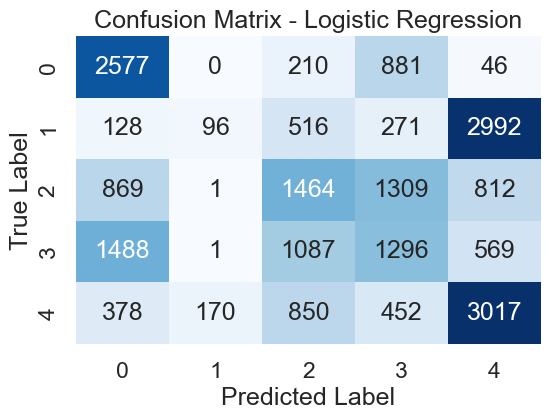

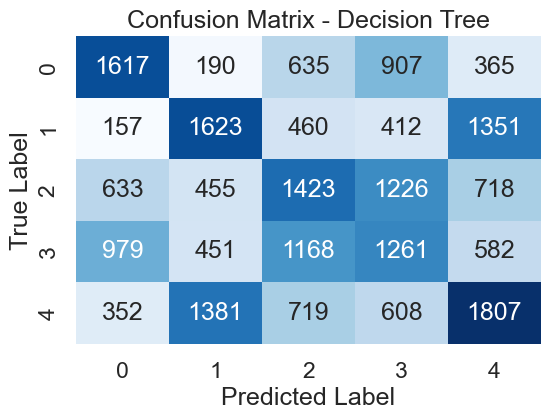

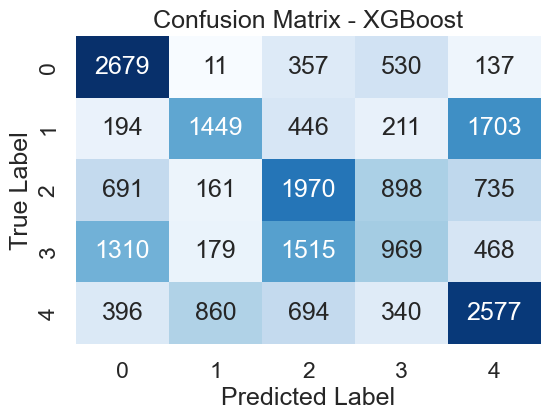

In [73]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define function to plot confusion matrix
def plot_confusion_matrix(model_name, cm):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Compute confusion matrices
log_reg_cm = confusion_matrix(y_test, log_reg_test_preds)
decision_tree_cm = confusion_matrix(y_test, decision_tree_test_preds)
xgb_cm = confusion_matrix(y_test, xgb_test_preds)

# Plot confusion matrices
plot_confusion_matrix("Logistic Regression", log_reg_cm)
plot_confusion_matrix("Decision Tree", decision_tree_cm)
plot_confusion_matrix("XGBoost", xgb_cm)


In [76]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'min_child_weight': [1, 3, 5]
}

# Initialize XGBoost classifier
xgb = XGBClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train a new XGBoost classifier with the best parameters
best_xgb = XGBClassifier(**best_params, random_state=42)
best_xgb.fit(X_train_scaled, y_train)

# Evaluate the new XGBoost classifier
best_xgb_test_preds = best_xgb.predict(X_test_scaled)
best_xgb_test_accuracy = accuracy_score(y_test, best_xgb_test_preds)

# Display the best parameters and the improved accuracy score
print("Best Parameters:", best_params)
print("Improved Test Accuracy:", best_xgb_test_accuracy)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100}
Improved Test Accuracy: 0.45730912476722535


In [82]:
# Calculate precision, recall, and F1-score for XGBoost
xgb_precision = precision_score(y_test, best_xgb_test_preds, average='weighted', zero_division=0)
xgb_recall = recall_score(y_test, best_xgb_test_preds, average='weighted', zero_division=0)
xgb_f1 = f1_score(y_test, best_xgb_test_preds, average='weighted', zero_division=0)

# Display precision, recall, and F1-score for each classifier
print("XGBoost - Precision:", xgb_precision)
print("XGBoost - Recall:", xgb_recall)
print("XGBoost - F1-score:", xgb_f1)


XGBoost - Precision: 0.4559053819128985
XGBoost - Recall: 0.45730912476722535
XGBoost - F1-score: 0.4395157140501376


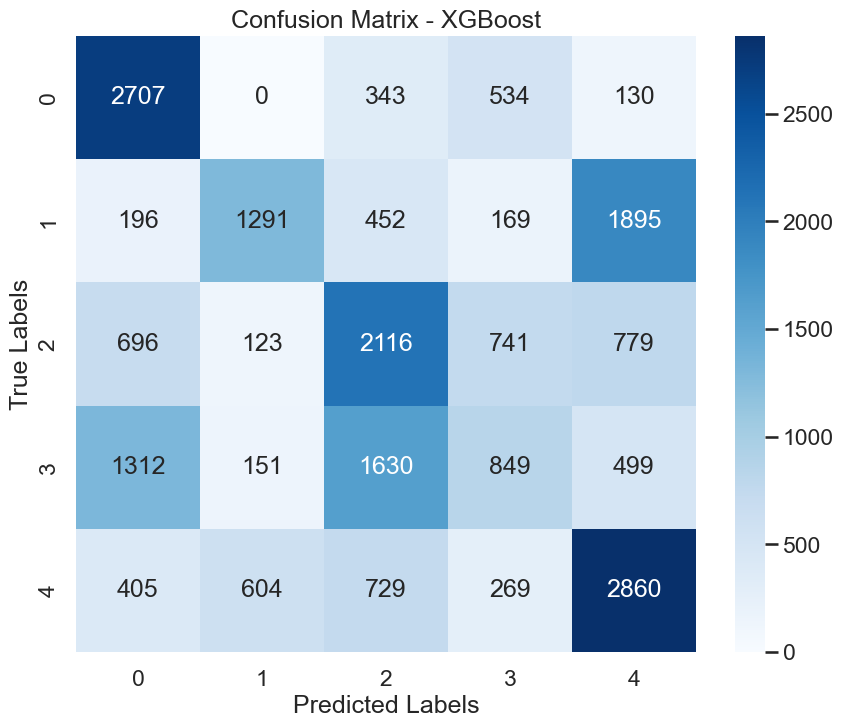

In [83]:
# Plot confusion matrix for XGBoost
xgb_cm = confusion_matrix(y_test, best_xgb_test_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - XGBoost')
plt.show()

#### Section F - 13 Rolling Window Mapping target feature (Label-Encoding classes)

In [78]:
## assign it as the masterTable rolling_metrics_all_surfaces

masterTable = rolling_metrics_all_surfaces.copy()

In [79]:
# Define the mapping
label_mapping = {
    'tile': 0,
    'grass': 1,
    'asphalt': 2,
    'concrete': 3,
    'stones': 4
}

# Map the labels using the dictionary
masterTable['Encoded_Surface'] = masterTable['surface'].map(label_mapping)

# Display the DataFrame with the new encoded labels
masterTable.sample(5)


accelerometer_mean  accelerometer_std  accelerometer_Skewness  \
44684            1.017726           0.074705                0.108595   
8025             1.015919           0.156493               -0.273463   
64953            1.010731           0.068734               -0.841458   
31085            1.027259           0.064453                0.116017   
43273            1.011274           0.064865                0.252953   

       accelerometer_kortsosis  gyro_mean  gyro_std  gyro_Skewness  \
44684                 3.841252  12.525551  6.358361       0.096265   
8025                  0.797214   4.805896  1.929985       0.396978   
64953                 3.411514   2.417158  0.874390       0.422730   
31085                -0.262025  10.224438  4.809966       0.242313   
43273                -0.020720   9.360614  5.103667       0.659529   

       gyro_kortsosis  surface  Encoded_Surface  
44684       -1.120355   stones                4  
8025        -0.162083  asphalt                2  
64953        0.043251     tile                0  
31085       -0.733961    grass                1  
43273       -0.491089   stones                4

In [80]:
# now we can remove the string lable 'Surface'
masterTable.drop('surface', axis =1 , inplace = True)

In [ ]:
masterTable

#### Section F - 14 Rolling Window Dataset checking multicollinearity

In [82]:
###
data = masterTable.copy()
# Calculate the correlation values
feature_cols = data.columns[:-1]
corr_values = data[feature_cols].corr()

# Simplify by emptying all the data below the diagonal
tril_index = np.tril_indices_from(corr_values) # The lower triangle

# Make the unused values NaNs
corr_array = np.array(corr_values) # Changing the df to an array
corr_array[tril_index] = np.nan # Assigning the lower traingle to nan
    
# Recreate Pandas correlation data frame
corr_values = pd.DataFrame(corr_array,columns = corr_values.columns, index= corr_values.index)

# Stack the data and convert to a data frame
corr_values = (corr_values
               .stack()
               .to_frame()
               .reset_index()
               .rename(columns={'level_0':'feature1',
                                'level_1':'feature2',
                                0:'correlation'}))

# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()
corr_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   feature1         28 non-null     object 
 1   feature2         28 non-null     object 
 2   correlation      28 non-null     float64
 3   abs_correlation  28 non-null     float64
dtypes: float64(2), object(2)
memory usage: 1.0+ KB


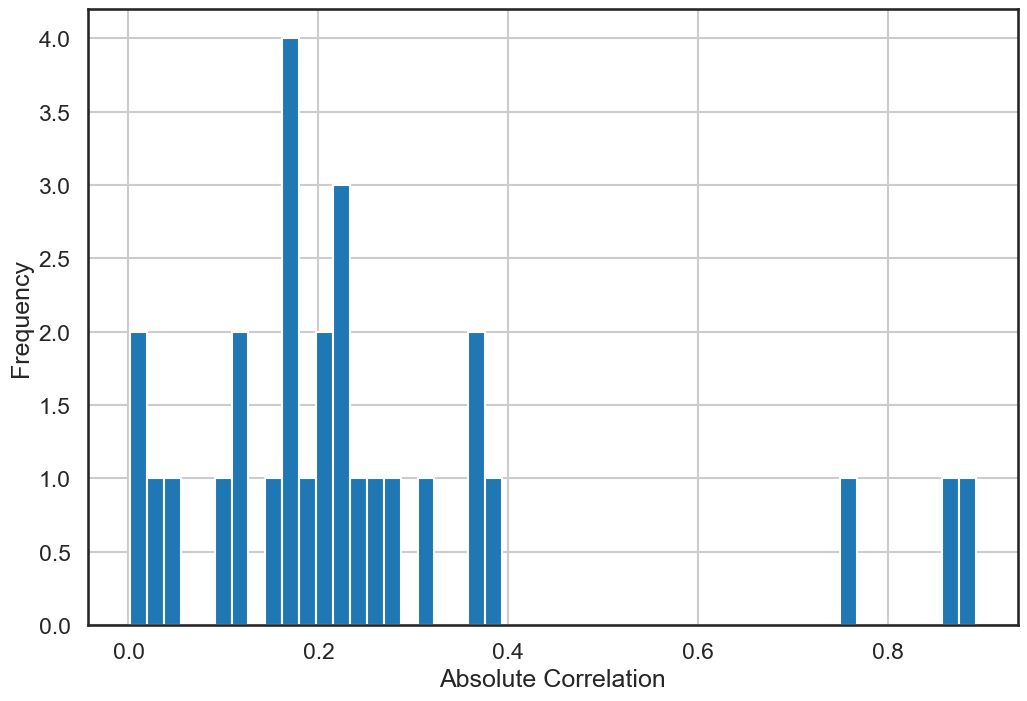

In [83]:
sns.set_context('talk')
sns.set_style('white')

ax = corr_values.abs_correlation.hist(bins=50, figsize=(12, 8))
ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

#### Section F - 15 Rolling Window Dataset Machine Learning

In [84]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target labels (y)
X = masterTable.drop('Encoded_Surface', axis = 1)
y = masterTable['Encoded_Surface'] # target feature 

# Split the data into training (70%) and test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)

# Display the shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (49772, 8) (49772,)
Test set shape: (21332, 8) (21332,)


In [85]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train) # formulating (equation)
X_test_scaled = scaler.transform(X_test) # tranforming only 

# Display the first few rows of the scaled training data to verify the transformation
print("Scaled Training Data:")
print(X_train_scaled[:5])

# Display the first few rows of the scaled test data to verify the transformation
print("Scaled Test Data:")
print(X_test_scaled[:5])


Scaled Training Data:
[[-9.09213732e-01 -4.60003842e-01  9.79825120e-02 -3.61031776e-01
  -7.80919299e-01 -8.15879469e-01 -6.64535303e-02  5.98010627e-01]
 [ 7.43021772e-02  2.77195273e-01  2.06097346e-01 -1.57738654e-01
   2.02866967e+00  2.05251448e+00  3.99768130e-03 -5.39962277e-01]
 [-7.29252236e-01 -1.48454678e-01 -1.63767888e+00  1.04179512e+00
  -7.89342589e-01 -6.77232874e-01 -7.41247532e-01 -6.71056326e-01]
 [ 4.07584744e-01  6.67402326e-01 -2.10142028e-01 -6.65641386e-01
  -4.83343049e-01 -5.06045096e-01 -4.80130546e-01 -2.59803083e-01]
 [ 3.20713137e-01  5.66026742e-01 -5.06541130e-04 -6.63152202e-01
  -4.48318207e-01 -5.06517939e-01 -5.05540238e-01 -3.16006088e-01]]
Scaled Test Data:
[[-0.86756113 -0.34995169  0.73242602  0.35548368 -0.86746084 -0.7347055
  -0.33782558 -0.61149621]
 [ 2.06792664  2.63008585  1.00876028 -0.85169347  1.65232343  1.17309104
   0.63108547  0.84117407]
 [-0.1115075   0.05691284 -1.41225631 -0.34163149  0.51210052  0.30518229
  -0.95380169 -0.77

In [86]:
# Initialize classifiers
log_reg = LogisticRegression(random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)

# # Train and evaluate Logistic Regression
log_reg.fit(X_train_scaled, y_train)
log_reg_train_preds = log_reg.predict(X_train_scaled)
log_reg_test_preds = log_reg.predict(X_test_scaled)
log_reg_train_accuracy = accuracy_score(y_train, log_reg_train_preds)
log_reg_test_accuracy = accuracy_score(y_test, log_reg_test_preds)

# Train and evaluate Decision Tree
decision_tree.fit(X_train_scaled, y_train)
decision_tree_train_preds = decision_tree.predict(X_train_scaled)
decision_tree_test_preds = decision_tree.predict(X_test_scaled)
decision_tree_train_accuracy = accuracy_score(y_train, decision_tree_train_preds)
decision_tree_test_accuracy = accuracy_score(y_test, decision_tree_test_preds)

# Train and evaluate XGBoost
xgb.fit(X_train_scaled, y_train)
xgb_train_preds = xgb.predict(X_train_scaled)
xgb_test_preds = xgb.predict(X_test_scaled)
xgb_train_accuracy = accuracy_score(y_train, xgb_train_preds)
xgb_test_accuracy = accuracy_score(y_test, xgb_test_preds)

# # Display accuracies
print("Logistic Regression - Train Accuracy:", log_reg_train_accuracy)
print("Logistic Regression - Test Accuracy:", log_reg_test_accuracy)
print("Decision Tree - Train Accuracy:", decision_tree_train_accuracy)
print("Decision Tree - Test Accuracy:", decision_tree_test_accuracy)
print("XGBoost - Train Accuracy:", xgb_train_accuracy)
print("XGBoost - Test Accuracy:", xgb_test_accuracy)


/Users/bushrajalali/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - Train Accuracy: 0.8135899702644057
Logistic Regression - Test Accuracy: 0.8146446652915807
Decision Tree - Train Accuracy: 1.0
Decision Tree - Test Accuracy: 0.9681230076879805
XGBoost - Train Accuracy: 0.999055693964478
XGBoost - Test Accuracy: 0.9885617851115694


In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define function to plot confusion matrix
def plot_confusion_matrix(model_name, cm):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Compute confusion matrices
log_reg_cm = confusion_matrix(y_test, log_reg_test_preds)
decision_tree_cm = confusion_matrix(y_test, decision_tree_test_preds)
xgb_cm = confusion_matrix(y_test, xgb_test_preds)

# Plot confusion matrices
plot_confusion_matrix("Logistic Regression", log_reg_cm)
plot_confusion_matrix("Decision Tree", decision_tree_cm)
plot_confusion_matrix("XGBoost", xgb_cm)


#### Section F - 16 Reducing dimensions size 

`We want to maintain the high accuracy while reducing data size to avoid high-dimensionality`

In [ ]:
masterTable

In [87]:
# Split the data into features (X) and target labels (y)
X = masterTable.drop('Encoded_Surface', axis = 1) # independent features 
y = masterTable['Encoded_Surface'] # dependent feature 

# Split the data into training (70%) and test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)

# Display the shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Training set shape: (49772, 8) (49772,)
Test set shape: (21332, 8) (21332,)


In [155]:
# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train) # formulating (equation)
X_test_scaled = scaler.transform(X_test) # tranforming only 

# Display the first few rows of the scaled training data to verify the transformation
print("Scaled Training Data:")
print(X_train_scaled[:5])

# Display the first few rows of the scaled test data to verify the transformation
print("Scaled Test Data:")
print(X_test_scaled[:5])

Scaled Training Data:
[[-9.09213732e-01 -4.60003842e-01  9.79825120e-02 -3.61031776e-01
  -7.80919299e-01 -8.15879469e-01 -6.64535303e-02  5.98010627e-01]
 [ 7.43021772e-02  2.77195273e-01  2.06097346e-01 -1.57738654e-01
   2.02866967e+00  2.05251448e+00  3.99768130e-03 -5.39962277e-01]
 [-7.29252236e-01 -1.48454678e-01 -1.63767888e+00  1.04179512e+00
  -7.89342589e-01 -6.77232874e-01 -7.41247532e-01 -6.71056326e-01]
 [ 4.07584744e-01  6.67402326e-01 -2.10142028e-01 -6.65641386e-01
  -4.83343049e-01 -5.06045096e-01 -4.80130546e-01 -2.59803083e-01]
 [ 3.20713137e-01  5.66026742e-01 -5.06541130e-04 -6.63152202e-01
  -4.48318207e-01 -5.06517939e-01 -5.05540238e-01 -3.16006088e-01]]
Scaled Test Data:
[[-0.86756113 -0.34995169  0.73242602  0.35548368 -0.86746084 -0.7347055
  -0.33782558 -0.61149621]
 [ 2.06792664  2.63008585  1.00876028 -0.85169347  1.65232343  1.17309104
   0.63108547  0.84117407]
 [-0.1115075   0.05691284 -1.41225631 -0.34163149  0.51210052  0.30518229
  -0.95380169 -0.77

In [88]:
# Initialize PCA with desired number of components
pca = PCA(n_components=4) # testing 50% of the number of original features 

# Transform training and testing data
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [157]:
# Initialize classifiers
log_reg = LogisticRegression(random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)

# # Train and evaluate Logistic Regression
log_reg.fit(X_train_pca, y_train)
log_reg_train_preds = log_reg.predict(X_train_pca)
log_reg_test_preds = log_reg.predict(X_test_pca)
log_reg_train_accuracy = accuracy_score(y_train, log_reg_train_preds)
log_reg_test_accuracy = accuracy_score(y_test, log_reg_test_preds)

# Train and evaluate Decision Tree
decision_tree.fit(X_train_pca, y_train)
decision_tree_train_preds = decision_tree.predict(X_train_pca)
decision_tree_test_preds = decision_tree.predict(X_test_pca)
decision_tree_train_accuracy = accuracy_score(y_train, decision_tree_train_preds)
decision_tree_test_accuracy = accuracy_score(y_test, decision_tree_test_preds)

# Train and evaluate XGBoost
xgb.fit(X_train_pca, y_train)
xgb_train_preds = xgb.predict(X_train_pca)
xgb_test_preds = xgb.predict(X_test_pca)
xgb_train_accuracy = accuracy_score(y_train, xgb_train_preds)
xgb_test_accuracy = accuracy_score(y_test, xgb_test_preds)

# # Display accuracies
print("Logistic Regression - Train Accuracy:", log_reg_train_accuracy)
print("Logistic Regression - Test Accuracy:", log_reg_test_accuracy)
print("Decision Tree - Train Accuracy:", decision_tree_train_accuracy)
print("Decision Tree - Test Accuracy:", decision_tree_test_accuracy)
print("XGBoost - Train Accuracy:", xgb_train_accuracy)
print("XGBoost - Test Accuracy:", xgb_test_accuracy)


Logistic Regression - Train Accuracy: 0.7930563368962469
Logistic Regression - Test Accuracy: 0.797346709169323
Decision Tree - Train Accuracy: 1.0
Decision Tree - Test Accuracy: 0.8904931558222389
XGBoost - Train Accuracy: 0.9425178815398216
XGBoost - Test Accuracy: 0.9048378023626477


`We reduced 50% of features, and kept +90% of accuracy!`

In [ ]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'min_child_weight': [1, 3, 5]
}

# Initialize XGBoost classifier
xgb = XGBClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train_pca, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train a new XGBoost classifier with the best parameters
best_xgb = XGBClassifier(**best_params, random_state=42)
best_xgb.fit(X_train_pca, y_train)

# Evaluate the new XGBoost classifier
best_xgb_test_preds = best_xgb.predict(X_test_pca)
best_xgb_test_accuracy = accuracy_score(y_test, best_xgb_test_preds)

# Display the best parameters and the improved accuracy score
print("Best Parameters:", best_params)
print("Improved Test Accuracy:", best_xgb_test_accuracy)


In [ ]:
# Initialize XGBoost classifier
xgb = XGBClassifier(random_state=42,learning_rate = 0.1,max_depth = 7, min_child_weight =1, n_estimators =300 )

In [ ]:
xgb.fit(X_train_pca, y_train)
xgb_train_preds = xgb.predict(X_train_pca)
xgb_test_preds = xgb.predict(X_test_pca)
xgb_train_accuracy = accuracy_score(y_train, xgb_train_preds)
xgb_test_accuracy = accuracy_score(y_test, xgb_test_preds)


In [ ]:
xgb_test_accuracy # highest accuracy while using only 4 feautres that are extracted using PCA

In [ ]:
# final model 

In [ ]:
xgb